# Rifqi Akbar Mubarak
# PYTN-KS19-017
# Kelompok 1
# Python for Data Science by Hacktiv8
# **Final Projects 3 - Random Forest**

# Introduction

## Latar Belakang

Penyakit kardiovaskular (CVDs) adalah penyebab kematian nomor 1 secara global, mengambil sekitar 17,9 juta jiwa setiap tahun, yang menyumbang 31% dari semua kematian di seluruh dunia.
Gagal jantung adalah kejadian umum yang disebabkan oleh CVD dan kumpulan data ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Sebagian besar penyakit kardiovaskular dapat dicegah dengan mengatasi faktor risiko perilaku seperti penggunaan tembakau, diet tidak sehat dan obesitas, kurangnya aktivitas fisik, dan penggunaan alkohol yang berbahaya menggunakan strategi di seluruh populasi.

Orang dengan penyakit kardiovaskular atau yang berada pada risiko kardiovaskular tinggi (karena adanya satu atau lebih faktor risiko seperti hipertensi, diabetes, hiperlipidemia atau penyakit yang sudah ada) memerlukan deteksi dan manajemen dini di mana model pembelajaran mesin dapat sangat membantu.

## Dataset Heart Failure

Data ini memiliki 13 atribut dengan tujuan yang ingin dicapai dari final project ini adalah prediksi kematian akibat penyakit gagal jantung. Berikut adalah informasi atribut data heart failure : <Br>
1. age - umur pasien <Br>
2. anaemia - apakah ada pengurangan haemoglobin (1 = yes; 0 = no)<Br>
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L <Br>
4. diabetes - apakah pasien punya riwayat diabete (1 = yes; 0 = no)<Br>
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung <Br>
6. high_blood_pressure - apakah pasien punya darah tinggi (1 = yes; 0 = no)<Br>
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL <Br>
8. serum_creatinine - level serum creatinine di darah dalam mg/dL <Br>
9. serum_sodium - level serum sodium di darah dalam mEq/L <Br>
10. sex - apakah pasien pria atau wanita (1 = male; 0 = female) <Br>
11. smoking - apakah pasien merokok (1 = yes; 0 = no) <Br>
12. time - waktu dalam hari untuk follow-up <Br>
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up (1 = yes Death; 0 = no)

Data ini bersumber dari website kaggle : <Br>
https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data

## Objektif yang ingin dicapai

● Mampu memahami konsep Classification dengan Ensemble Model <Br>
● Mampu mempersiapkan data untuk digunakan dalam Ensemble Model <Br>
● Mampu mengimplementasikan Ensemble Model untuk membuat prediksi

# Import Libraries

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import statsmodels.api as sm 

import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
plt.rcParams["figure.figsize"] = [16, 12]

%matplotlib inline

import seaborn as sns
sns.set(style = 'white', color_codes = True)

import plotly.express as px

from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score,classification_report,recall_score,f1_score,precision_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

C:\Users\rifqi\AppData\Local\Temp\ipykernel_22092\420056335.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


# Data Loading

In [2]:
df_HeartFailure = pd.read_csv("heart_failure_clinical_records_dataset.csv", delimiter=',', encoding = "utf-8")
df_HeartFailure.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [3]:
df_HeartFailure.shape

(299, 13)

In [4]:
df_HeartFailure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# Data Cleaning

In [5]:
# Convert Data Type age to int
df_HeartFailure["age"] = df_HeartFailure["age"].astype(int)
df_HeartFailure.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0   75        0                       582         0                 20   
1   55        0                      7861         0                 38   
2   65        0                       146         0                 20   
3   50        1                       111         0                 20   
4   65        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

Terdapat 299 rekam medis pasien gagal jantung dengan 13 fitur. DEATH_EVENT adalah variabel dependen.

## Cek Missing Value

In [6]:
df_HeartFailure.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [7]:
df_HeartFailure.isnull().values.any()

False

Dataset ini tidak memiliki missing values atau artinya tidak terdapat data yang hilang

## Cek Duplikasi Data

In [8]:
df_HeartFailure.duplicated().any()

False

In [9]:
df_HeartFailure.duplicated().value_counts()

False    299
Name: count, dtype: int64

Pada dataset ini tidak ada data yang duplikat atau sama

## Cek Outliers

In [10]:
df_HeartFailure.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.829431    0.431438                581.839465    0.418060   
std     11.894997    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

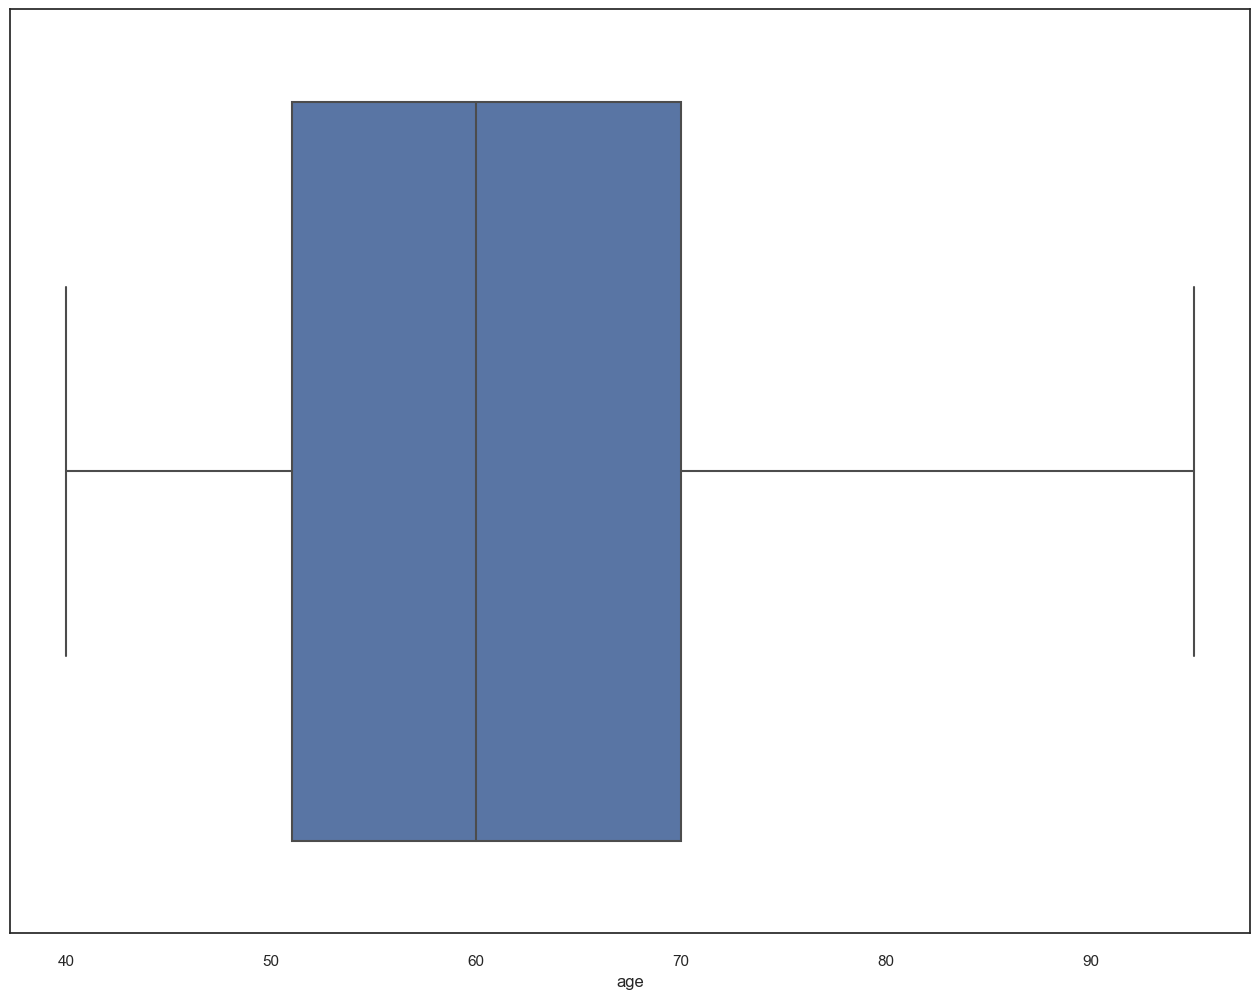

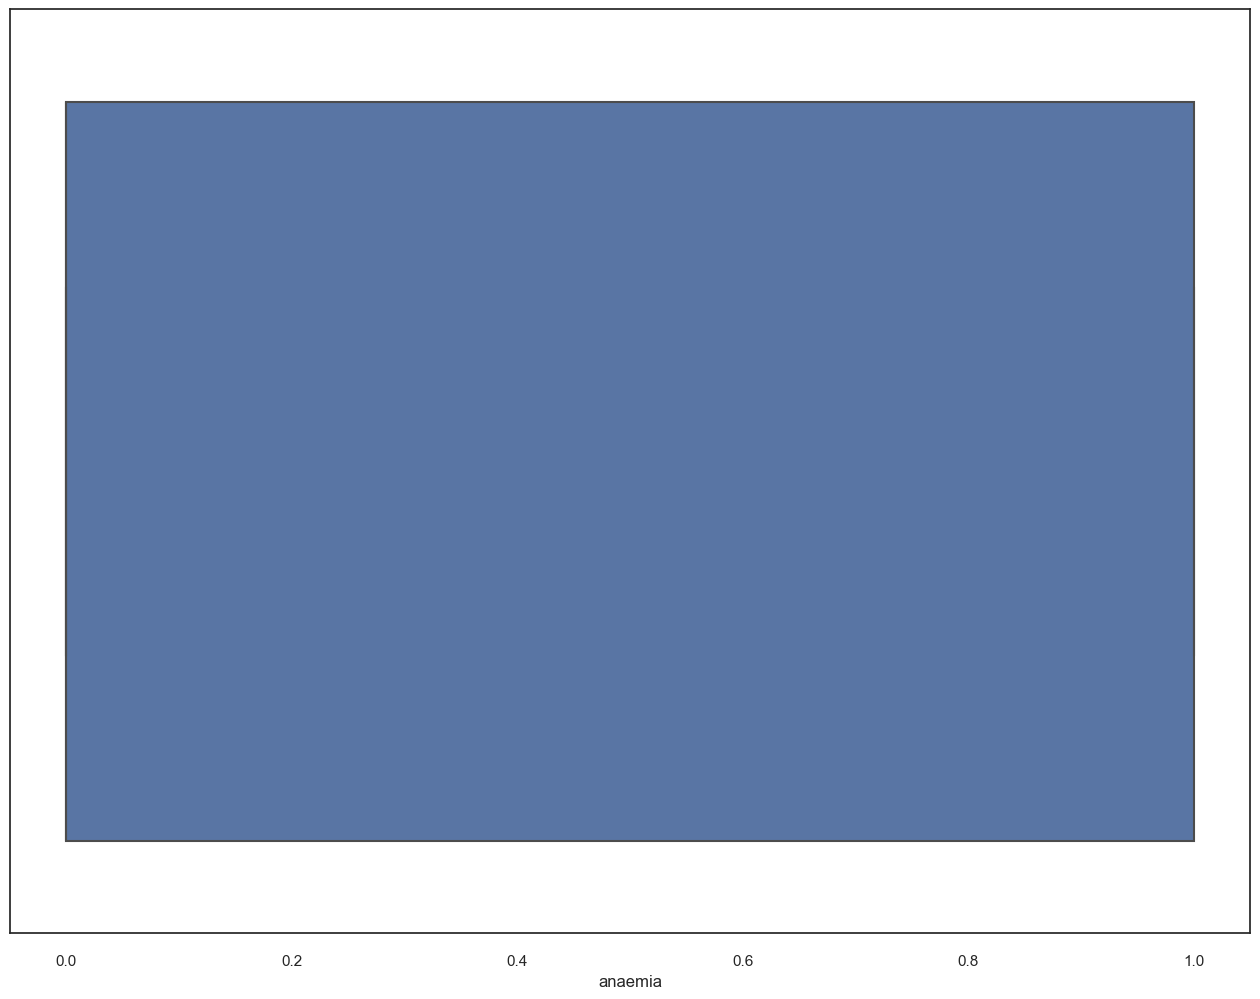

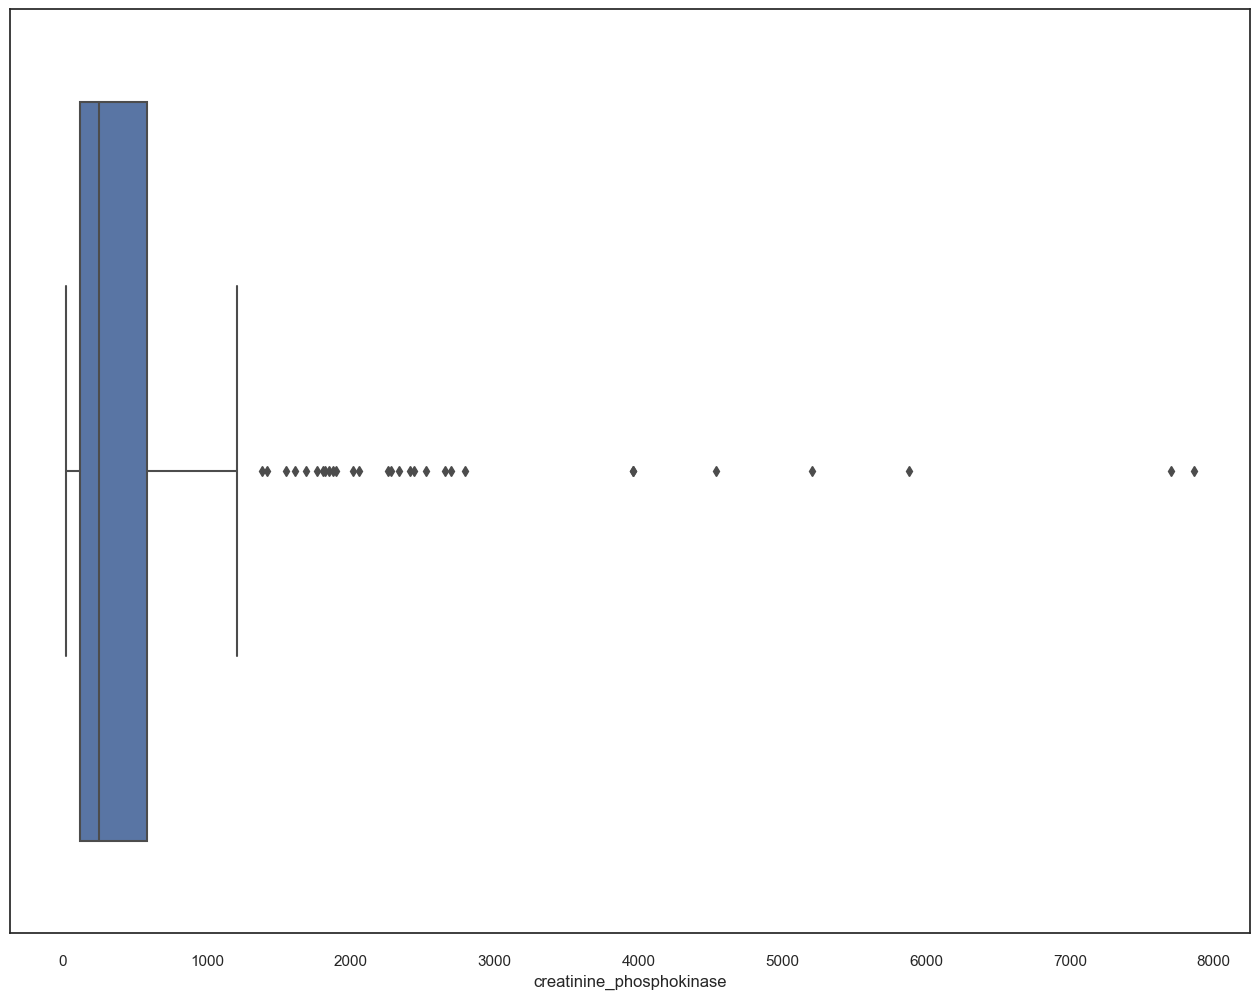

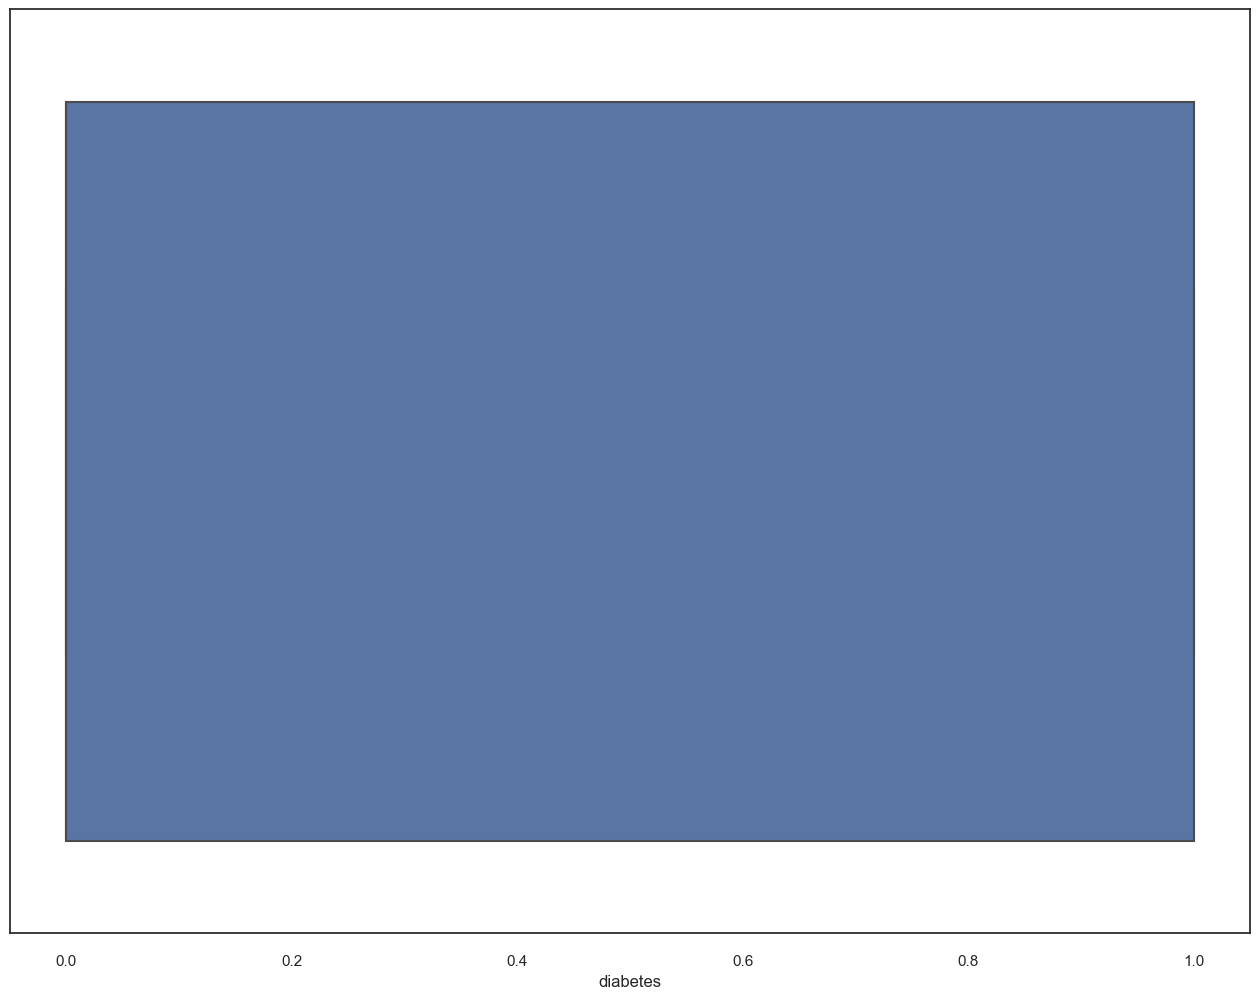

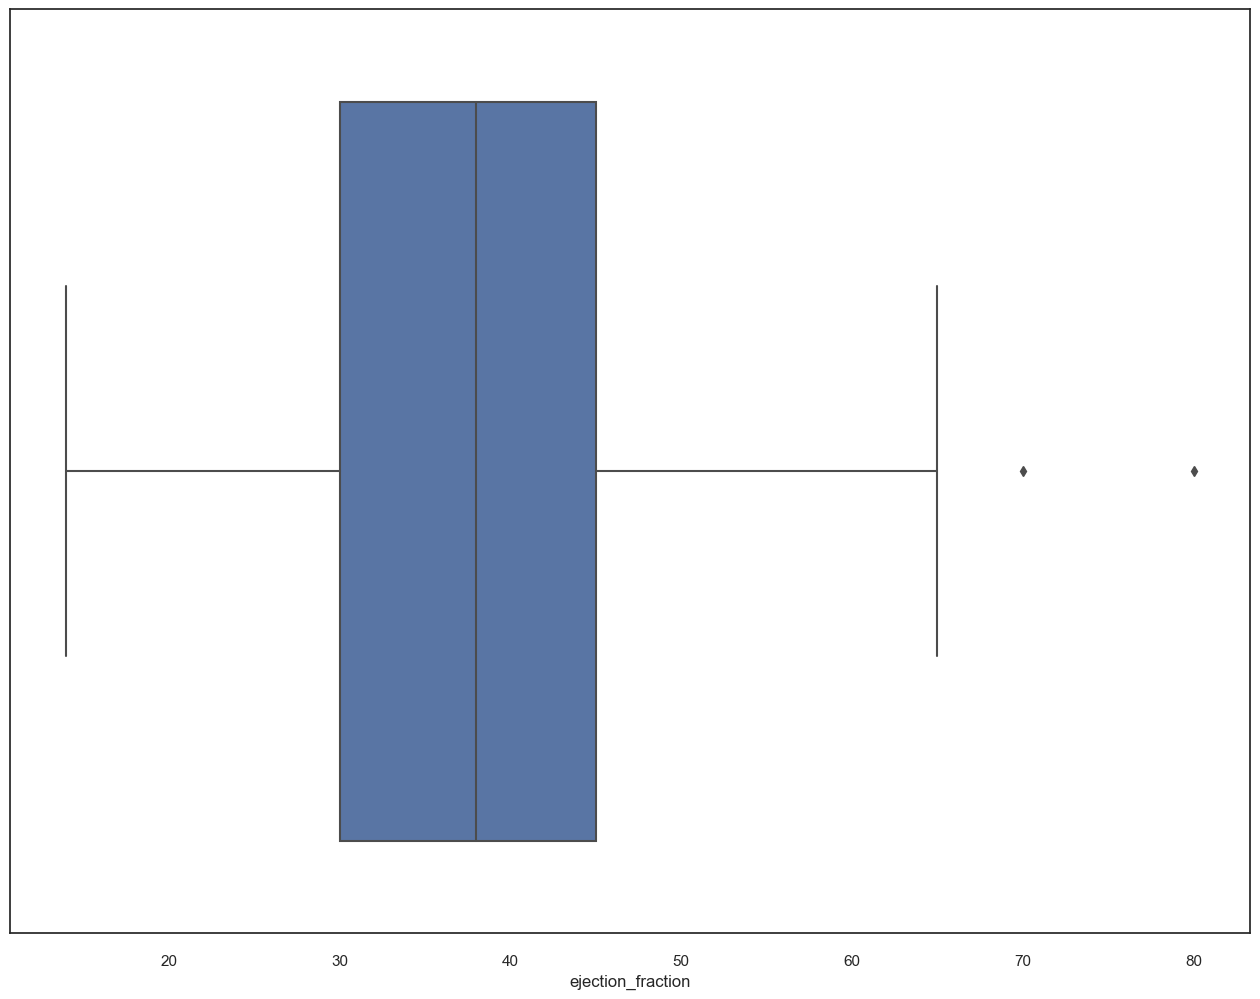

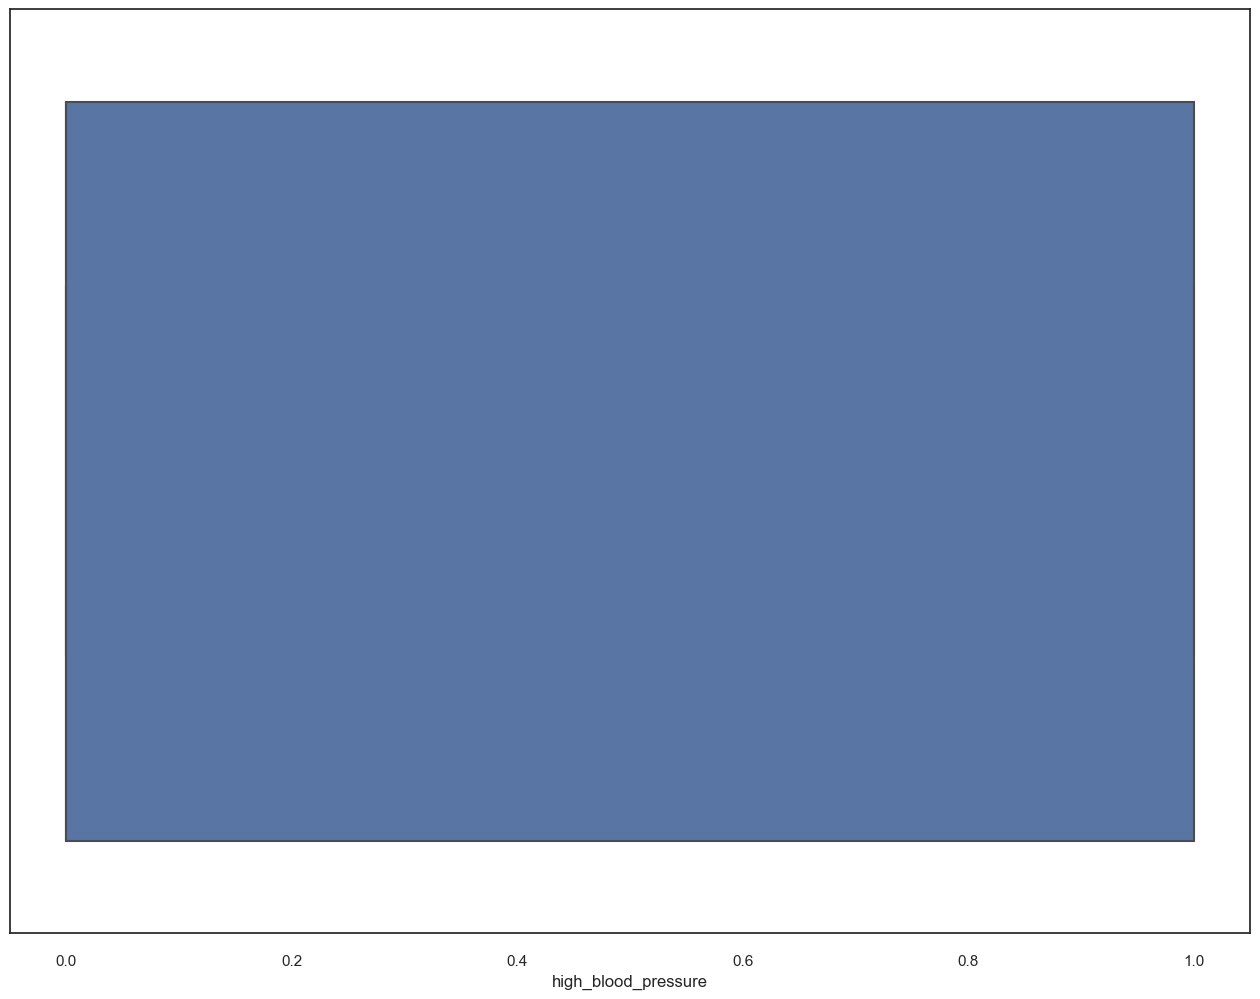

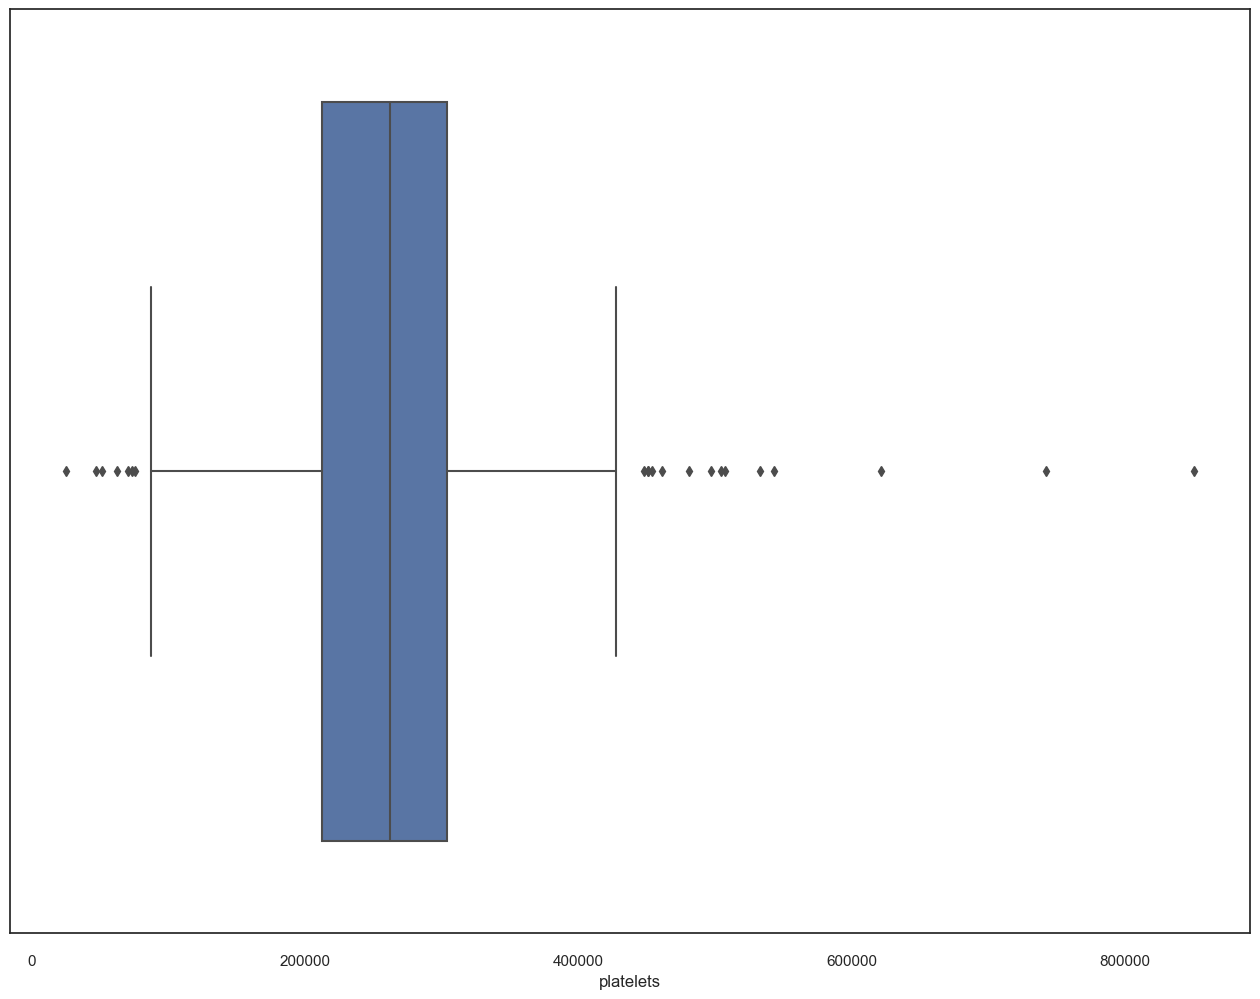

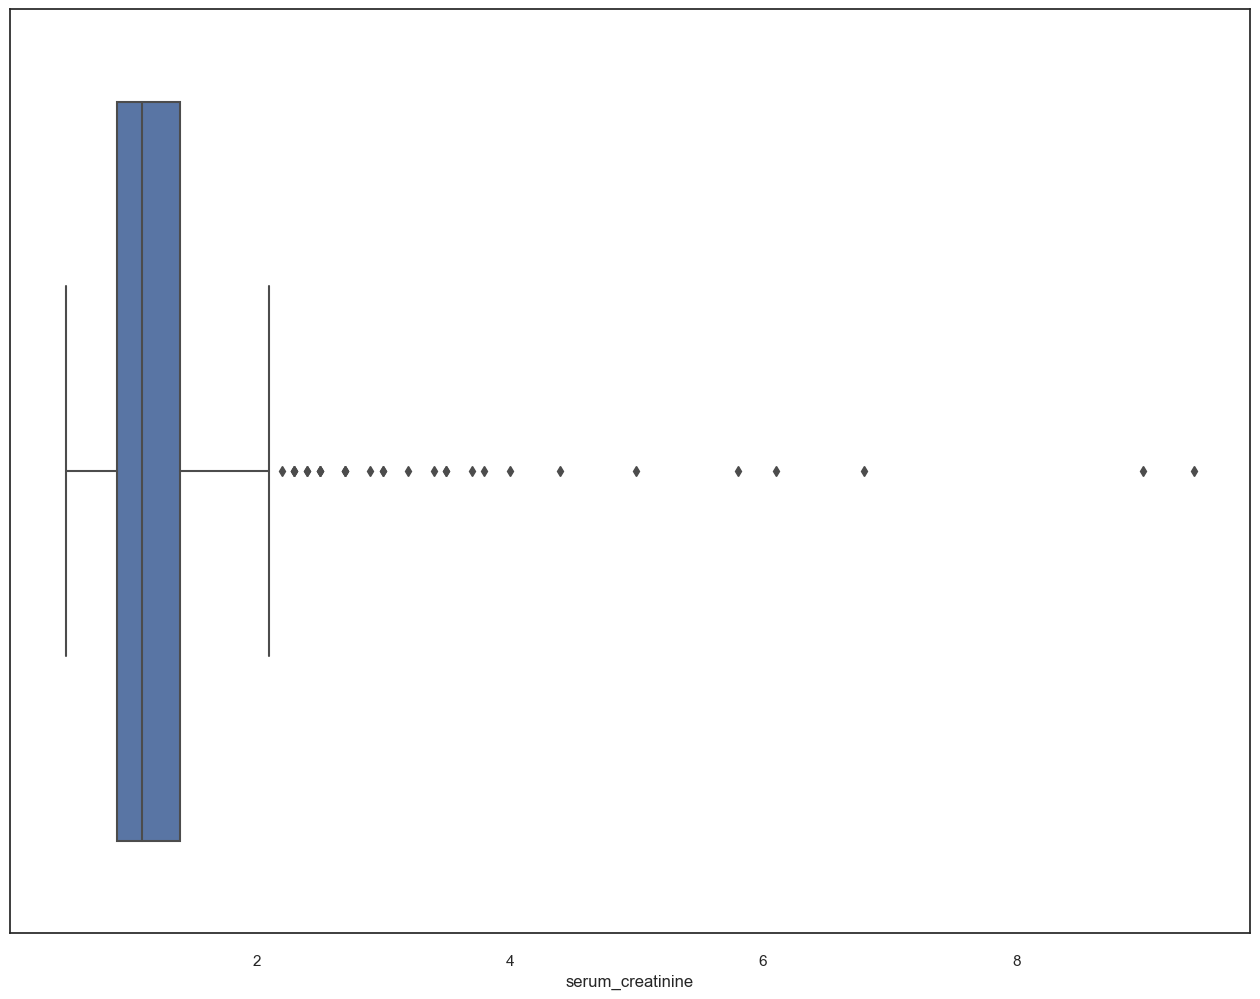

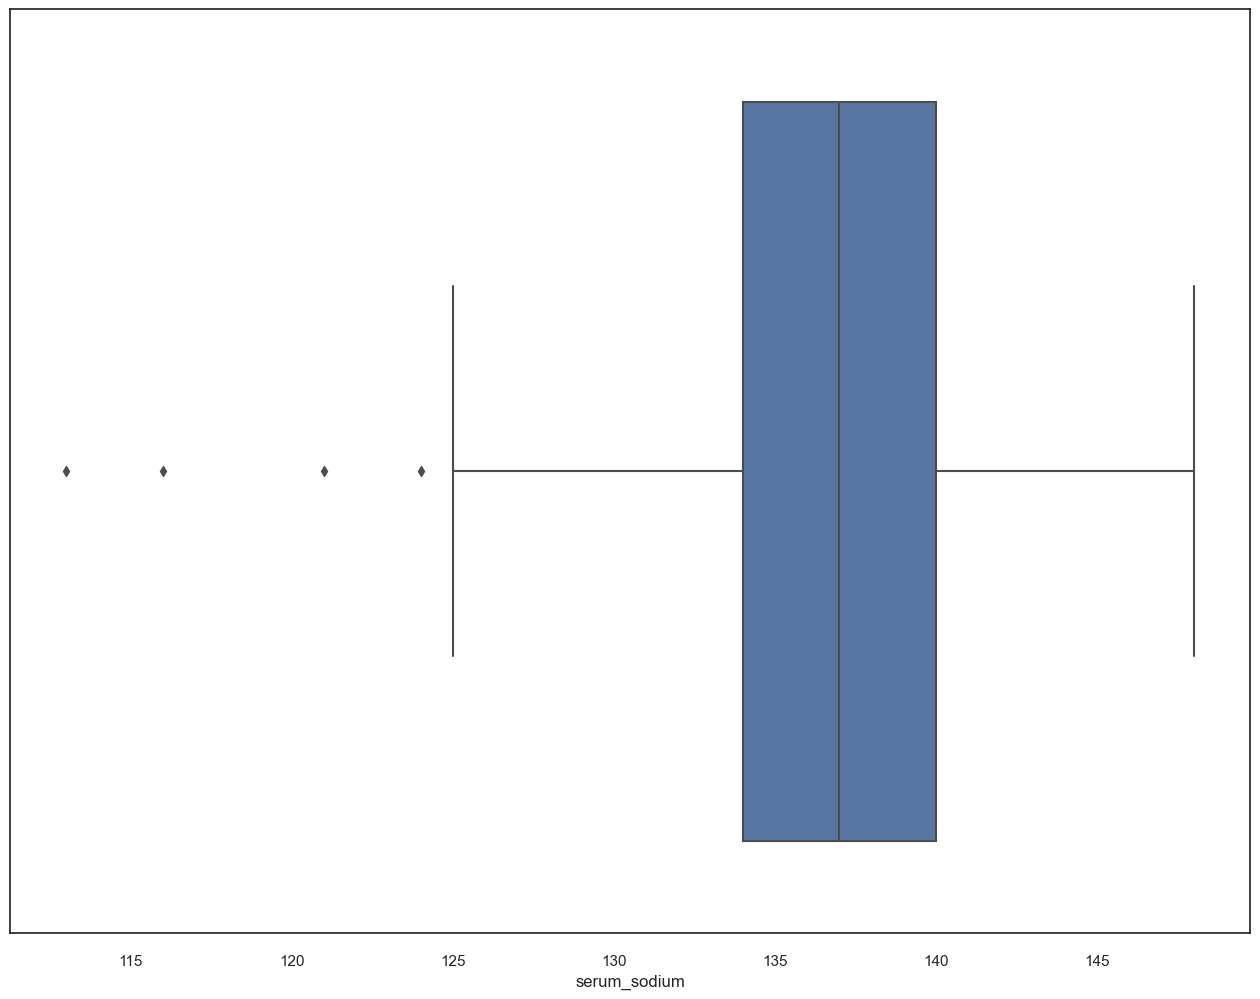

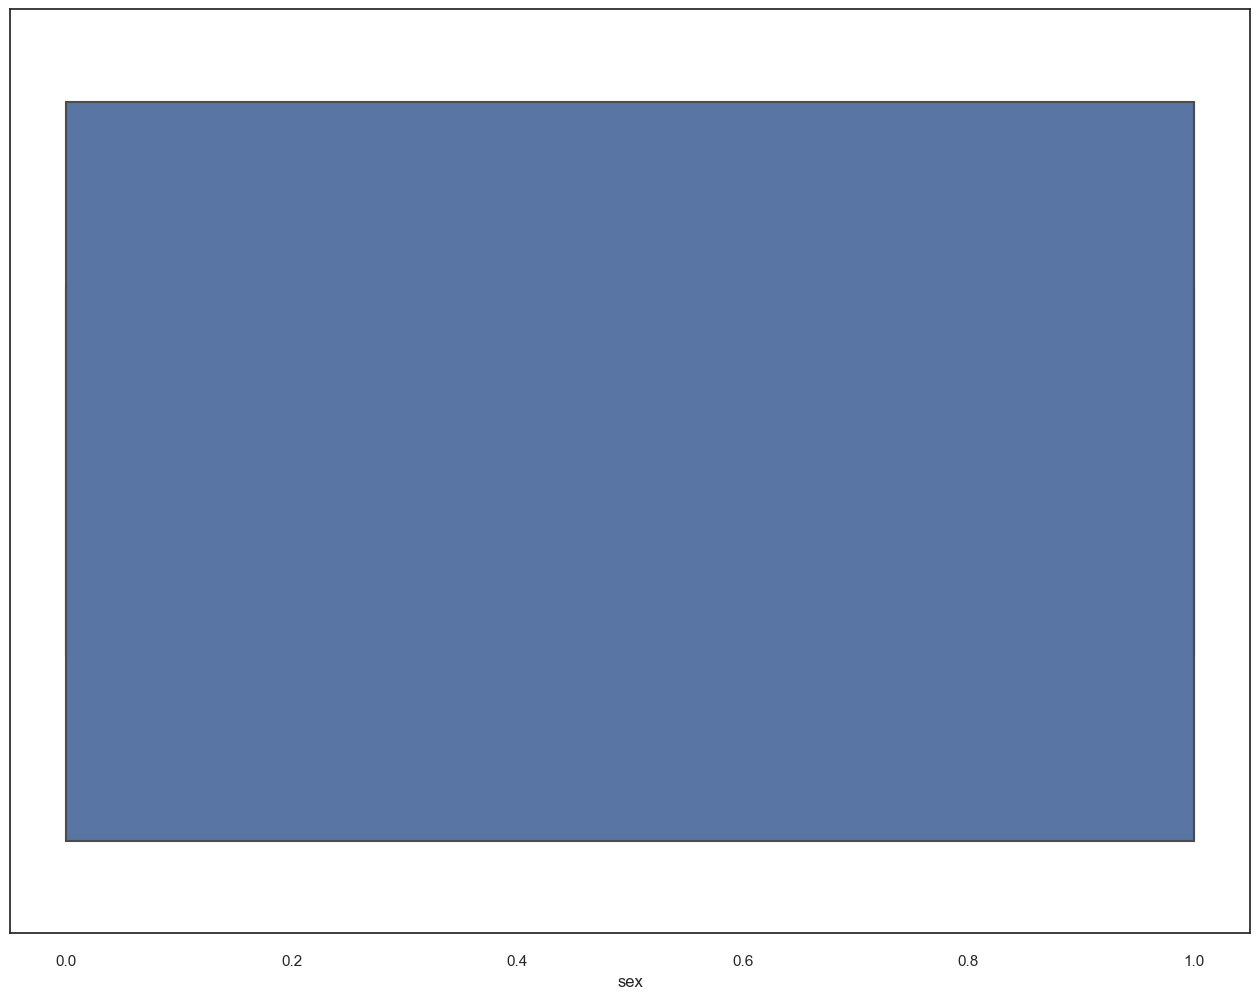

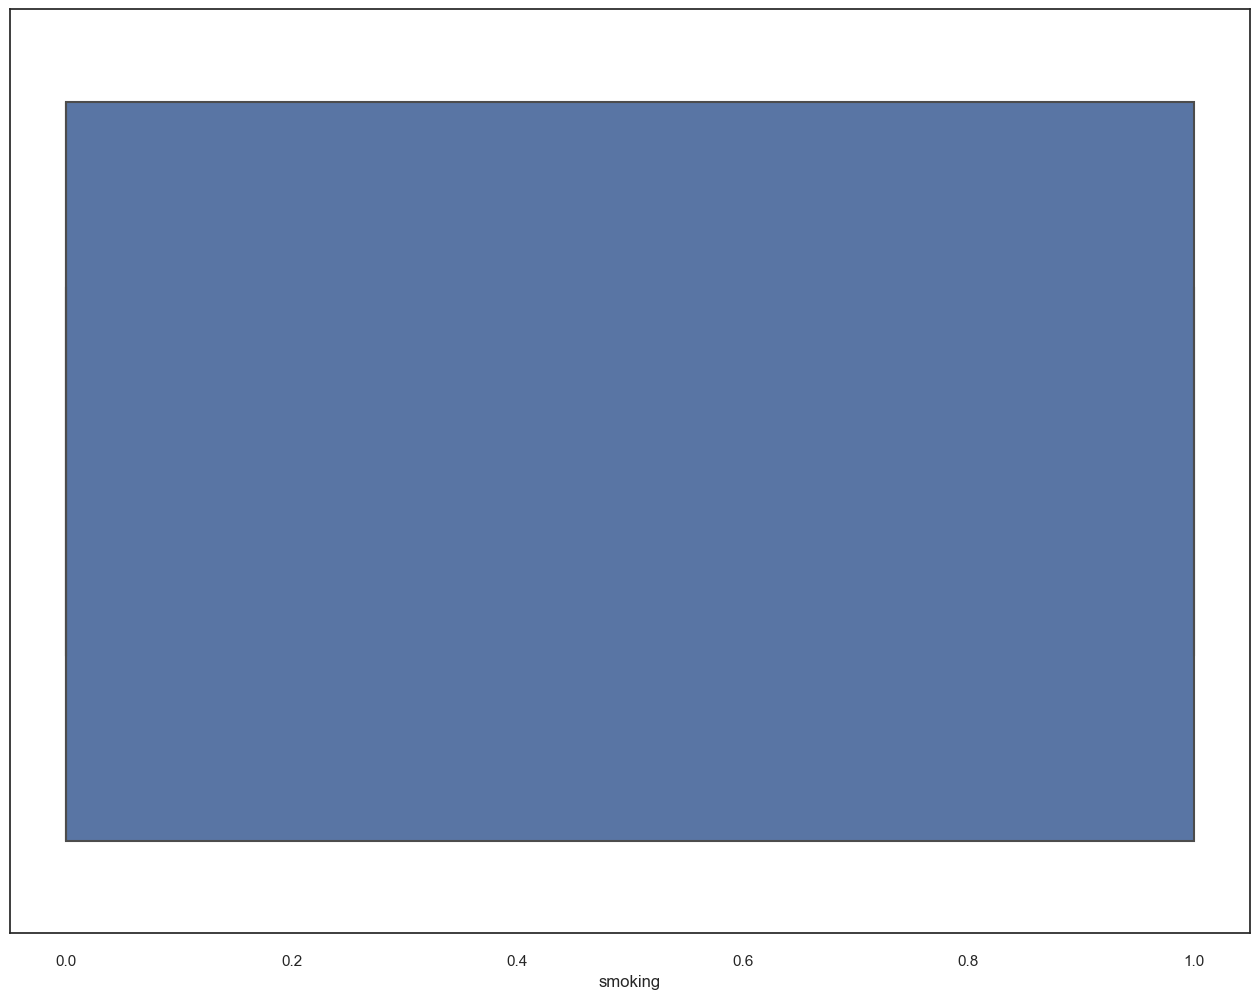

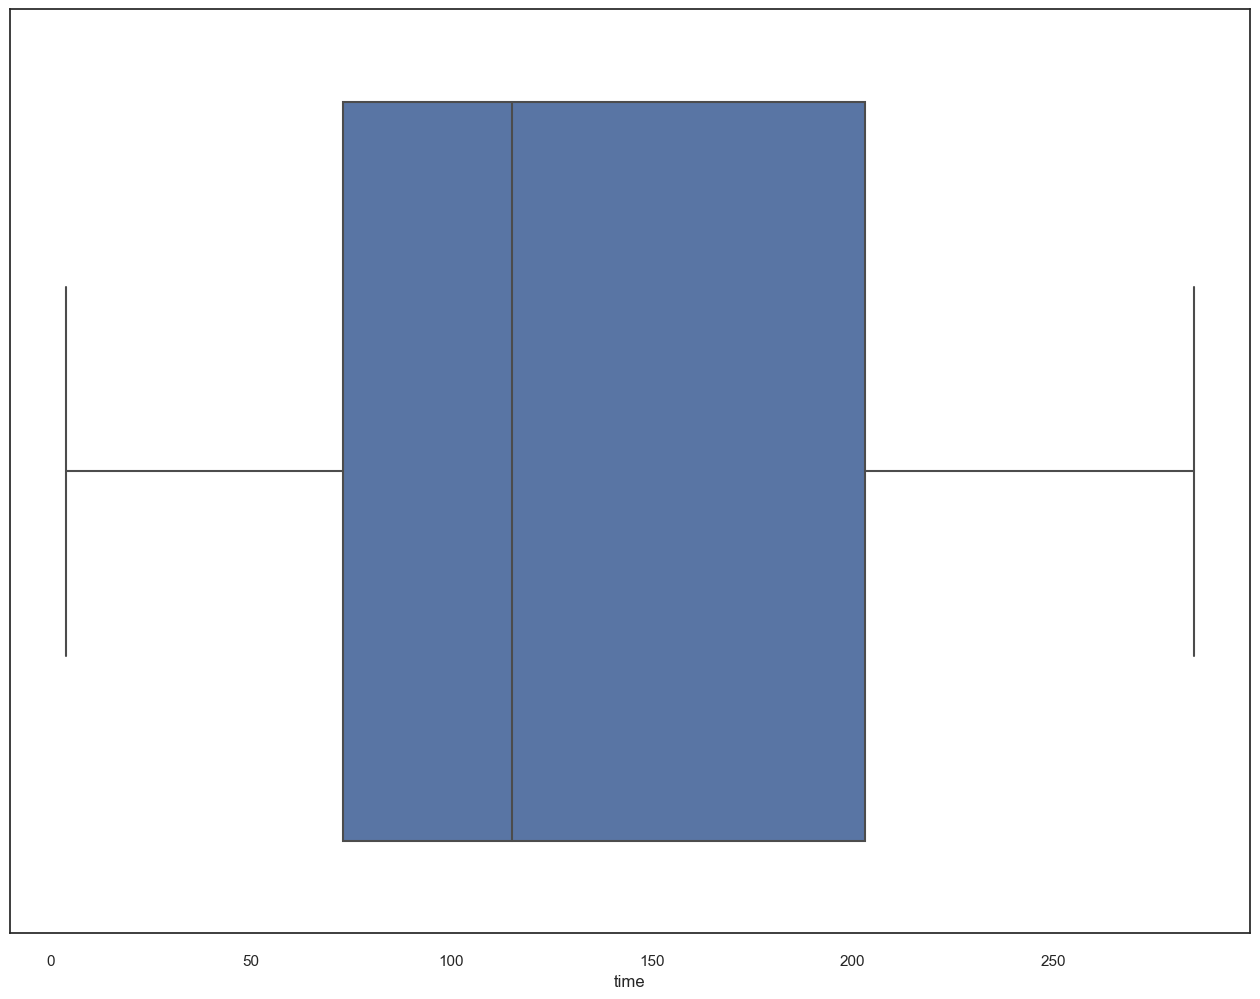

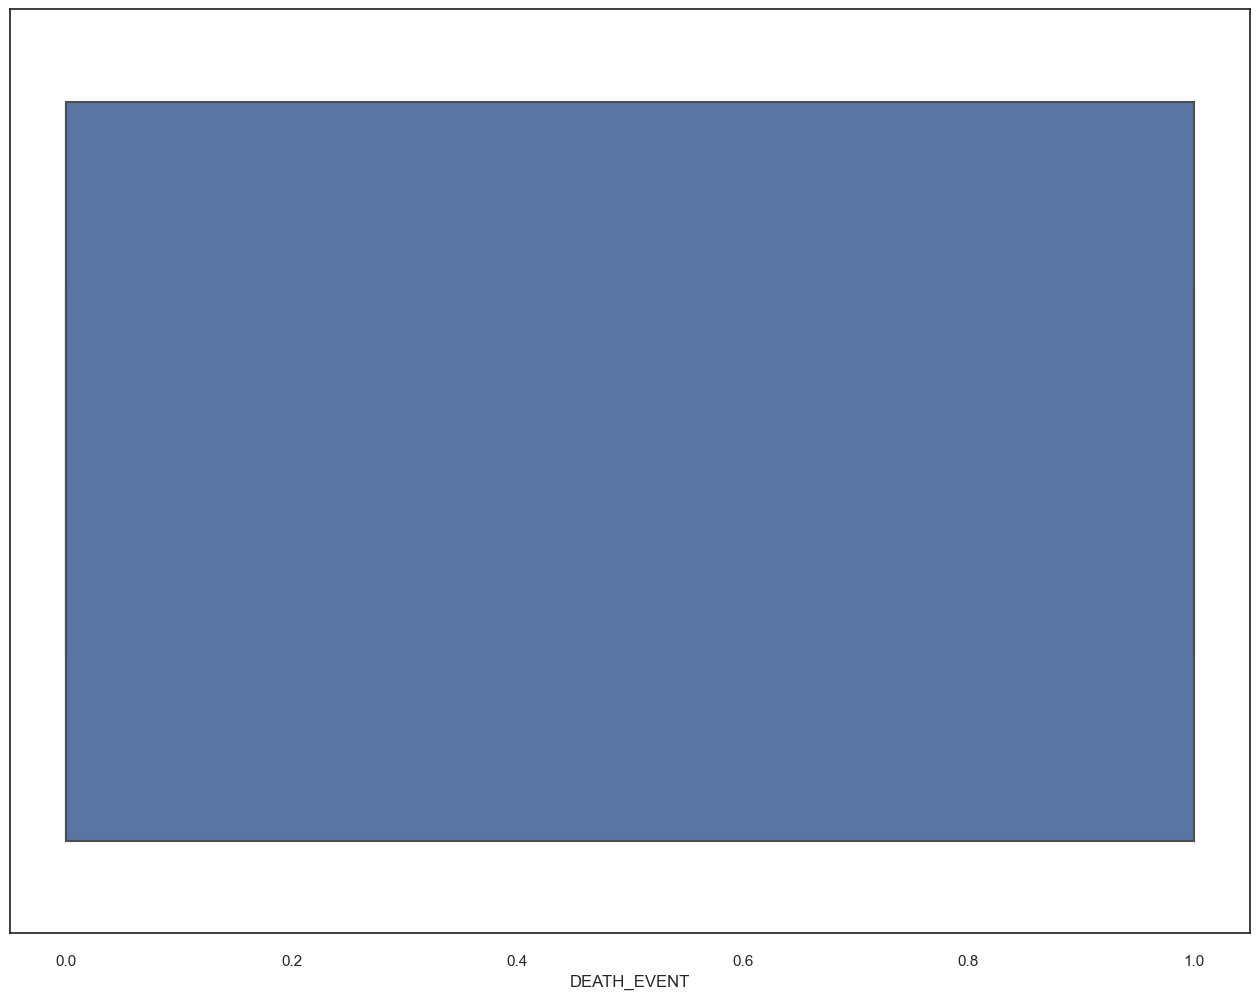

In [11]:
for col in df_HeartFailure.columns:
    plt.figure()
    sns.boxplot(x=df_HeartFailure[col])
plt.show()

**Mengatasi Outliers**

In [12]:
for x in df_HeartFailure.columns:
    Q1,Q3 = np.percentile(df_HeartFailure.loc[:,x], [25, 75])
    IQR = Q3-Q1
    
    upper_bound = Q3 + (1.5*IQR)
    lower_bound = Q1 - (1.5*IQR)

    df_HeartFailure.loc[df_HeartFailure[x] < lower_bound, x] = np.nan
    df_HeartFailure.loc[df_HeartFailure[x] > upper_bound, x] = np.nan

In [13]:
df_HeartFailure.isnull().sum()
median = df_HeartFailure.median()
df_HeartFailure.fillna(median,inplace=True)

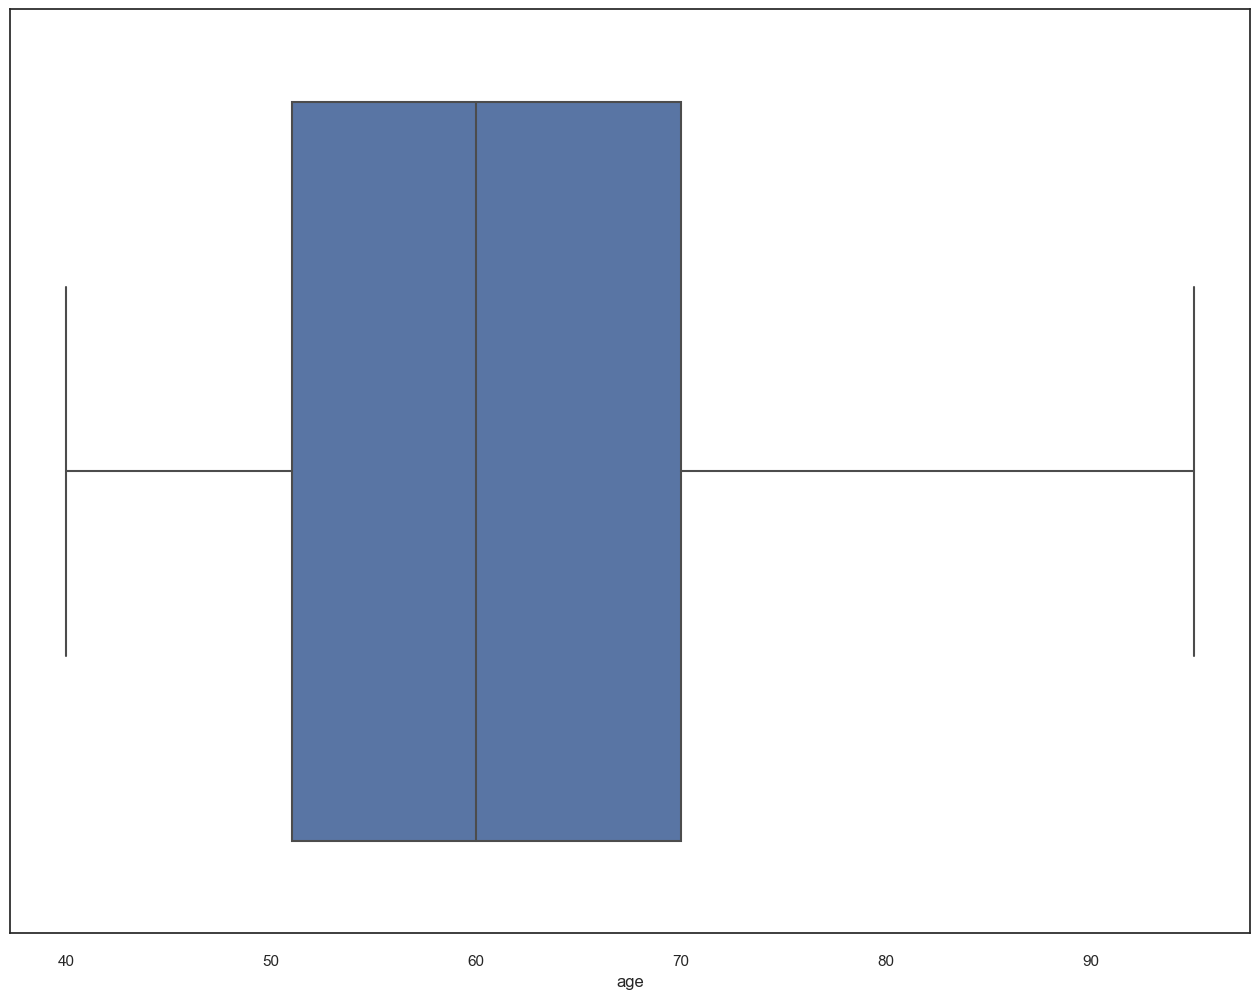

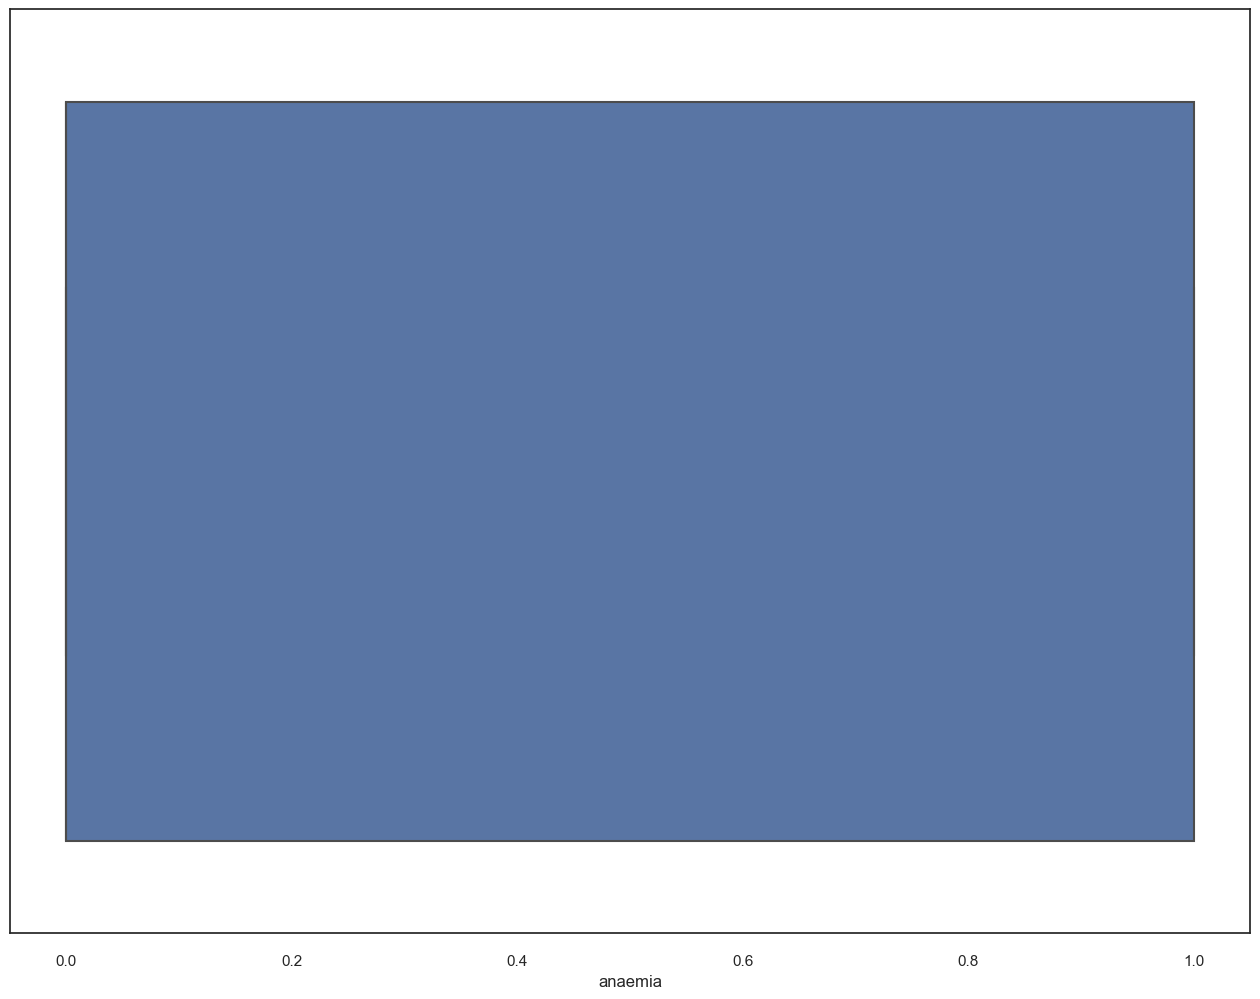

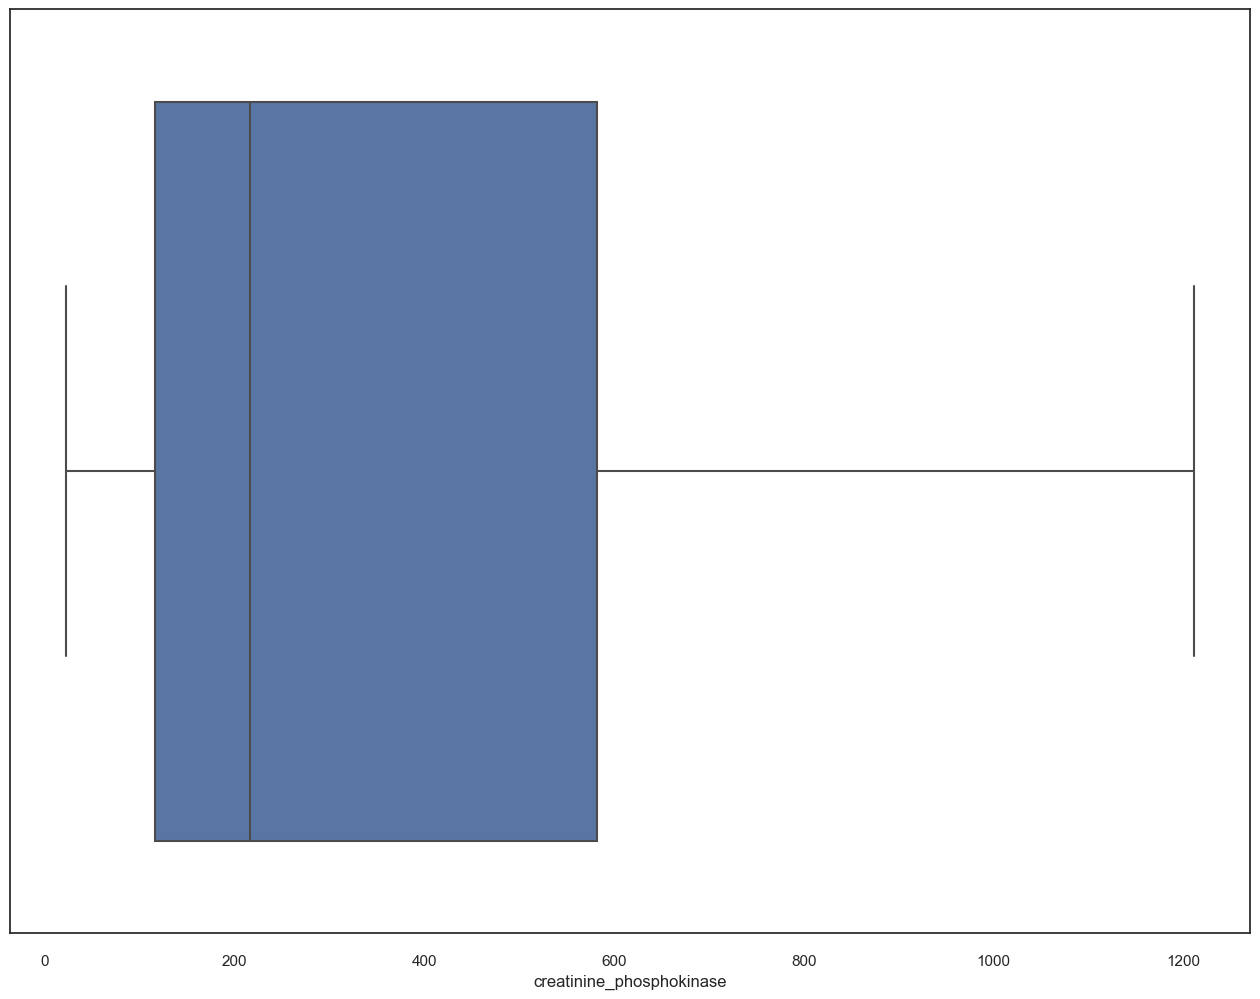

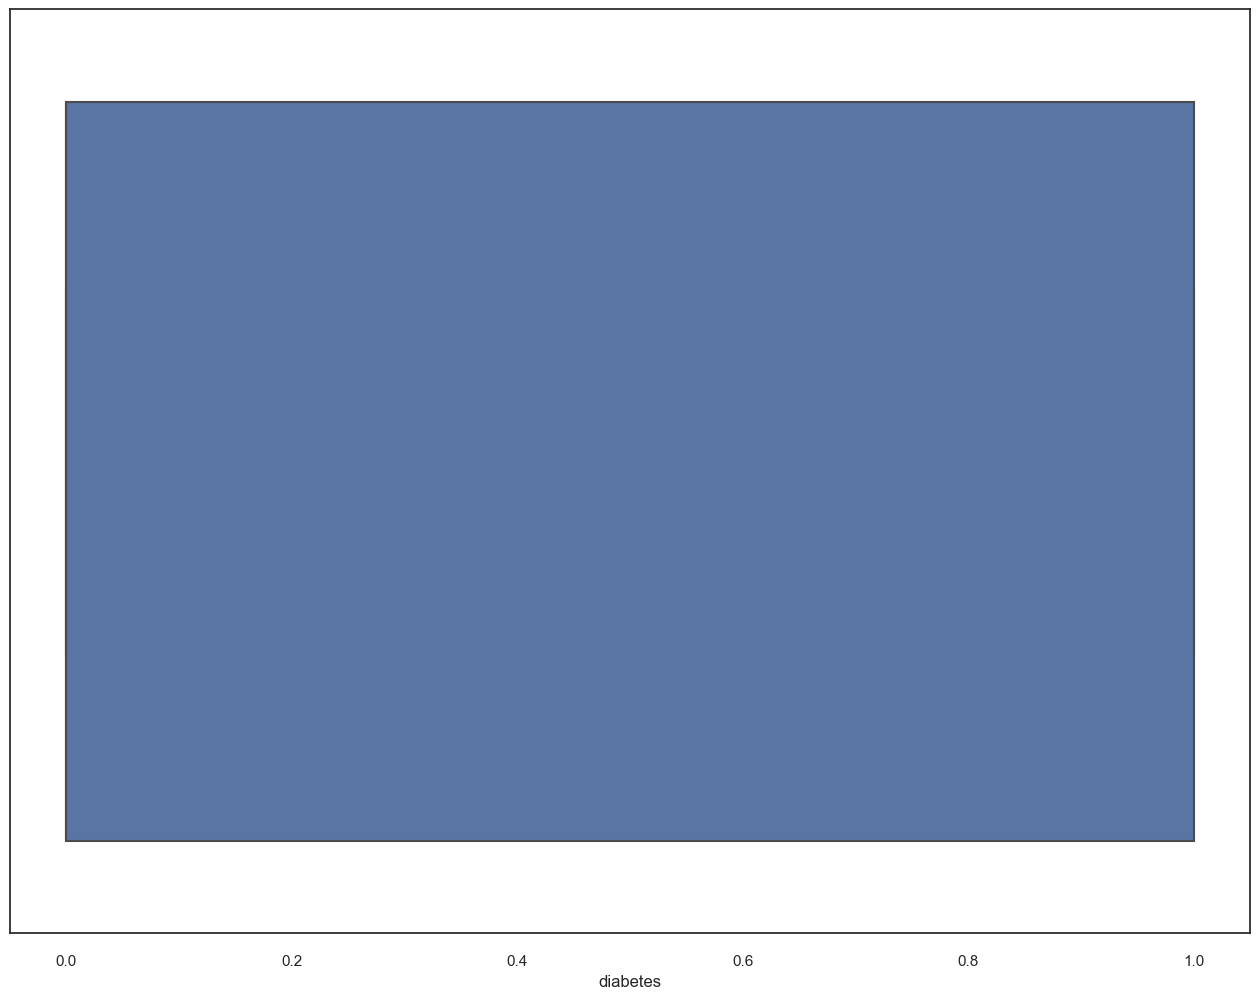

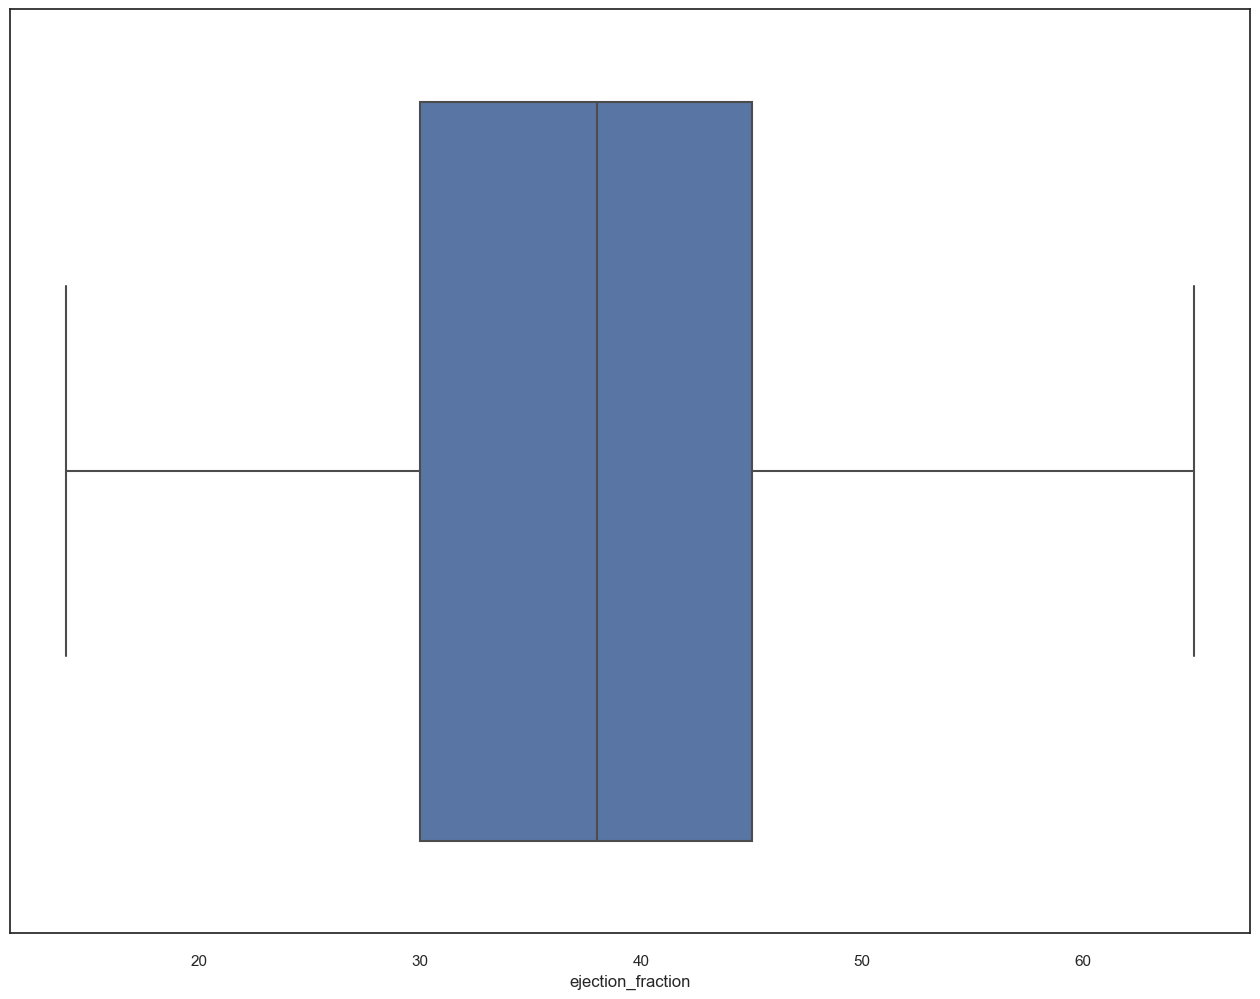

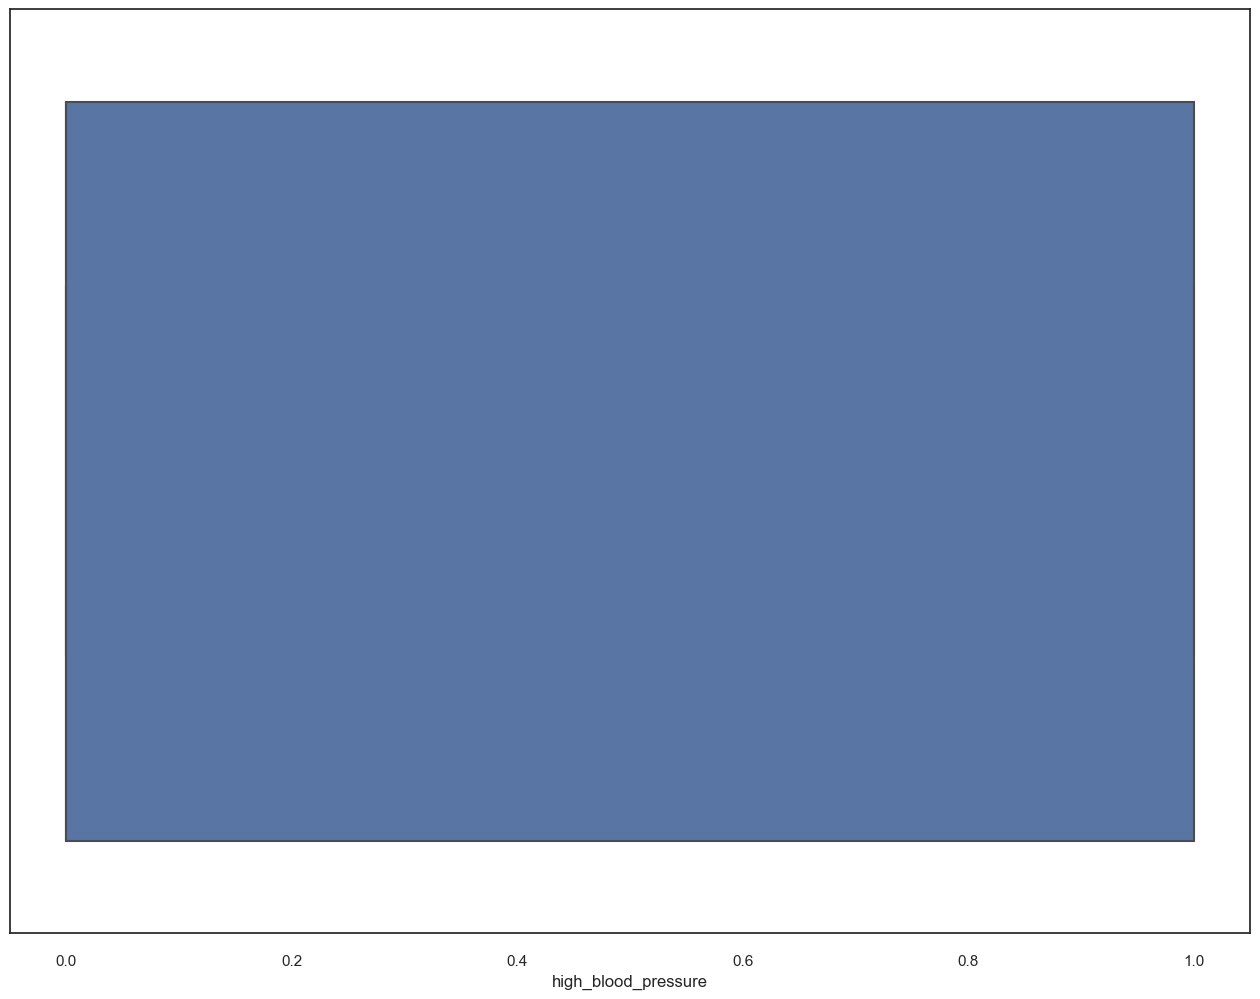

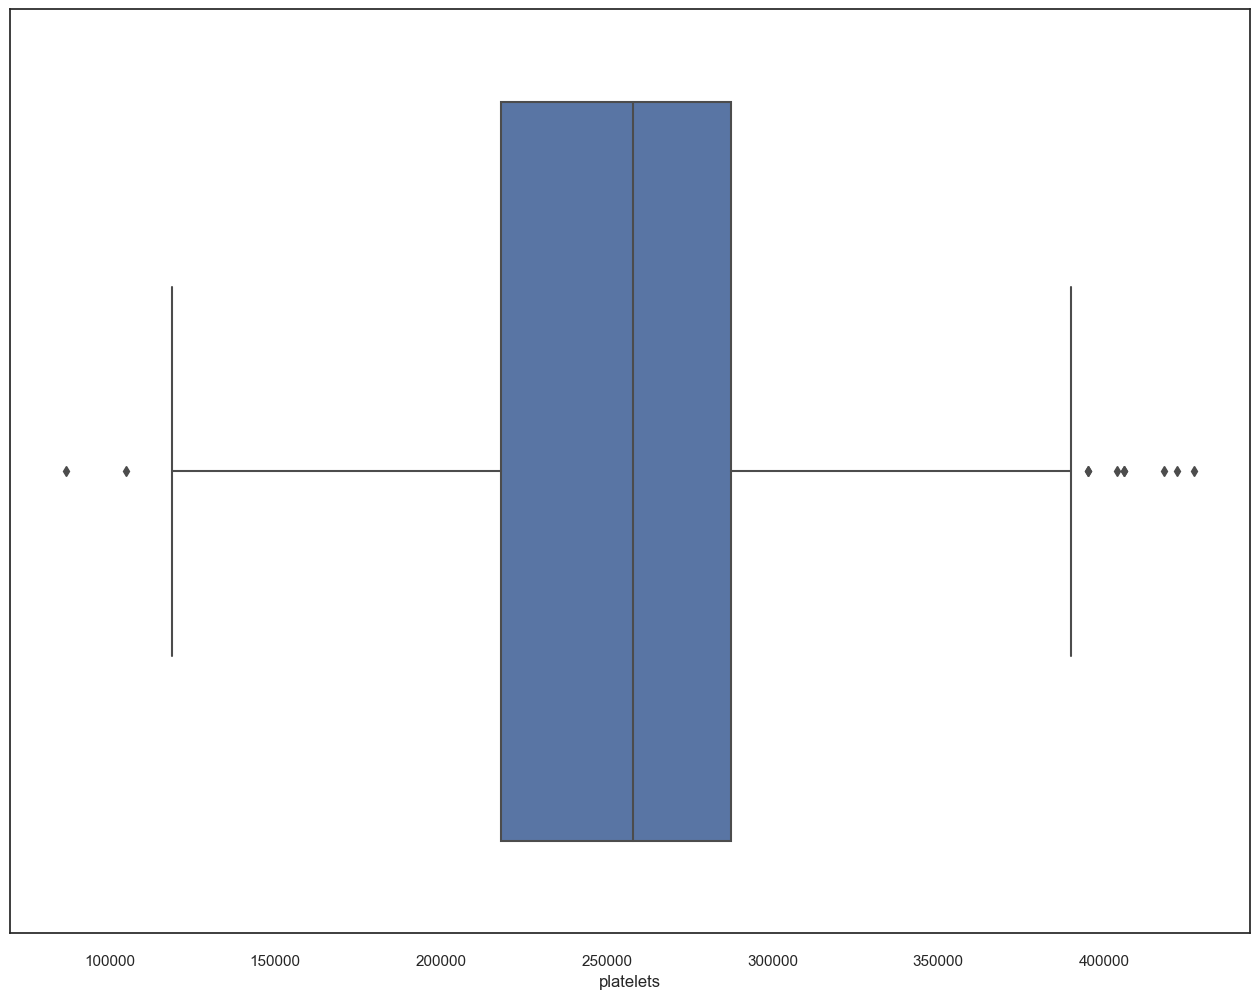

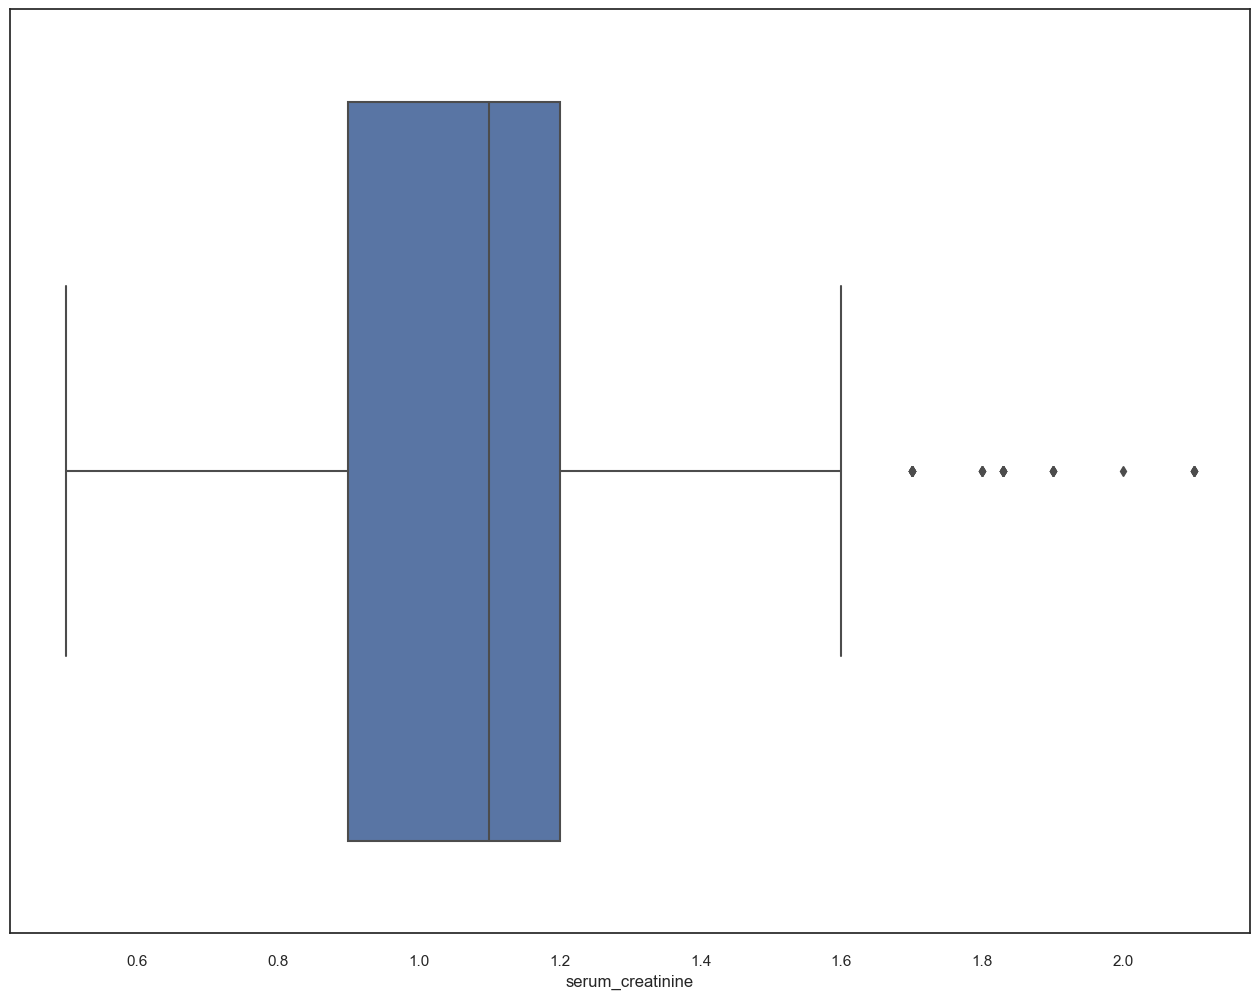

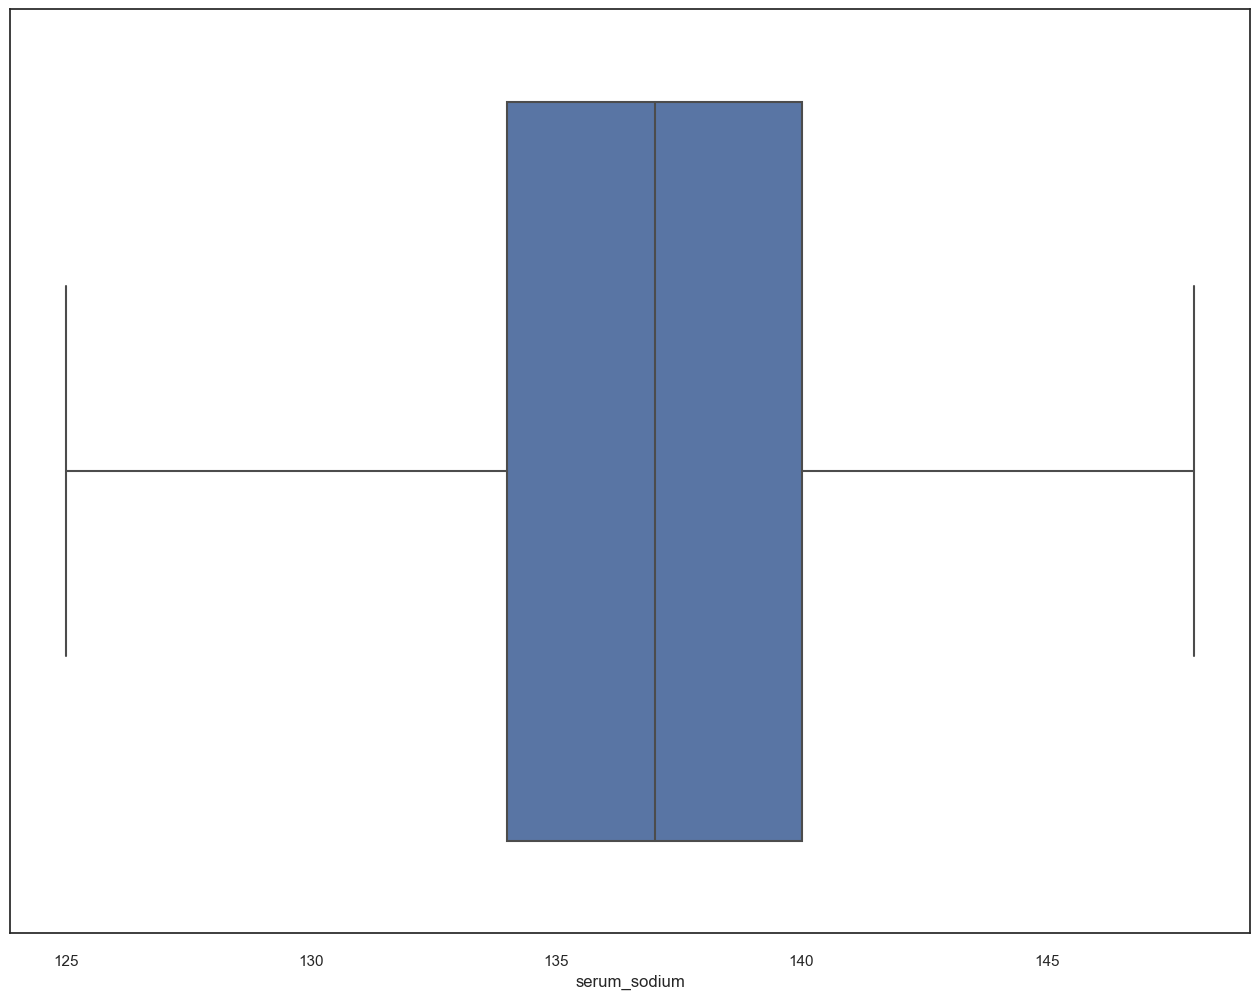

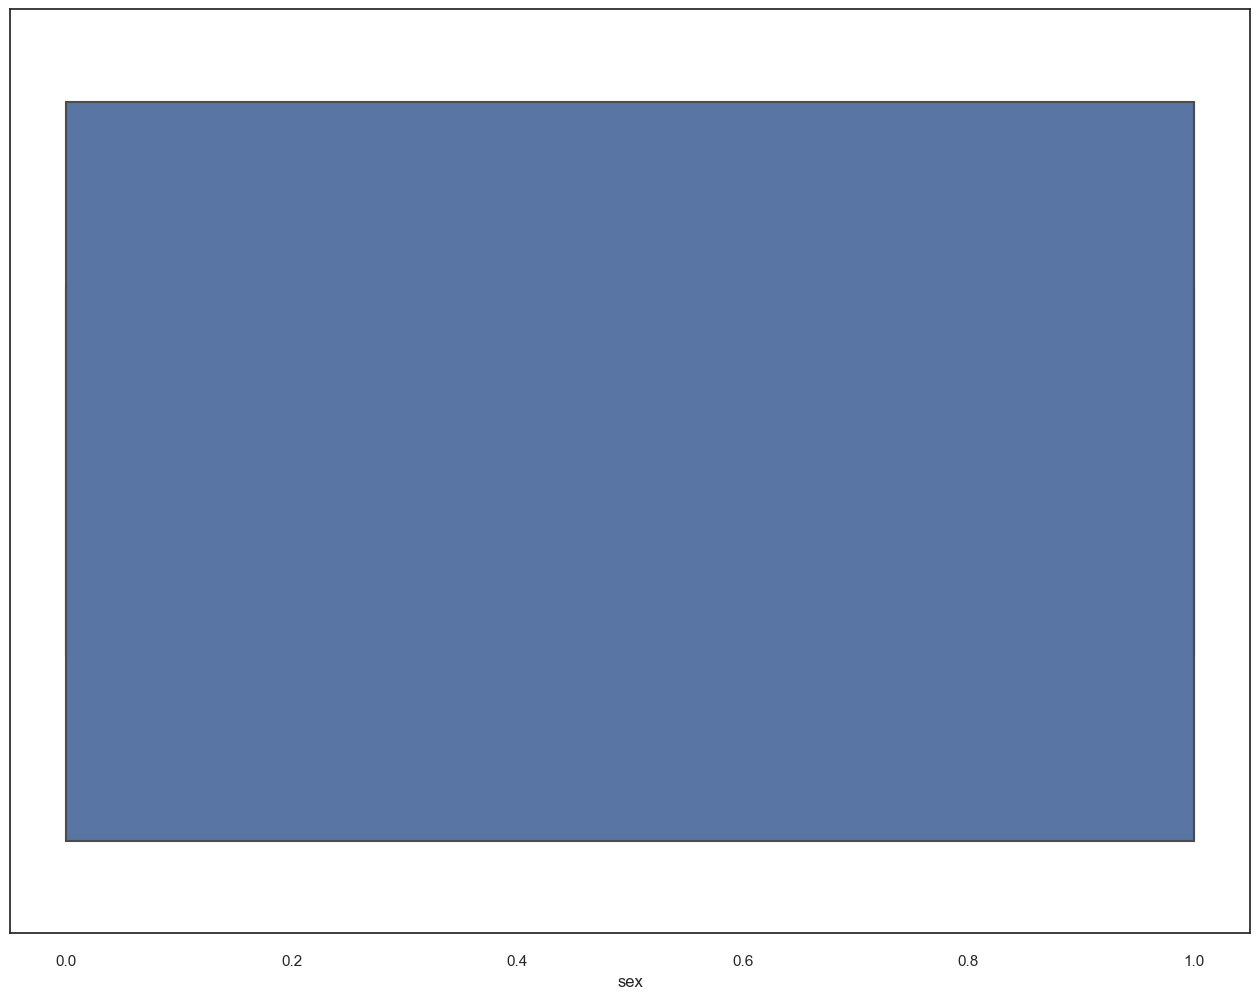

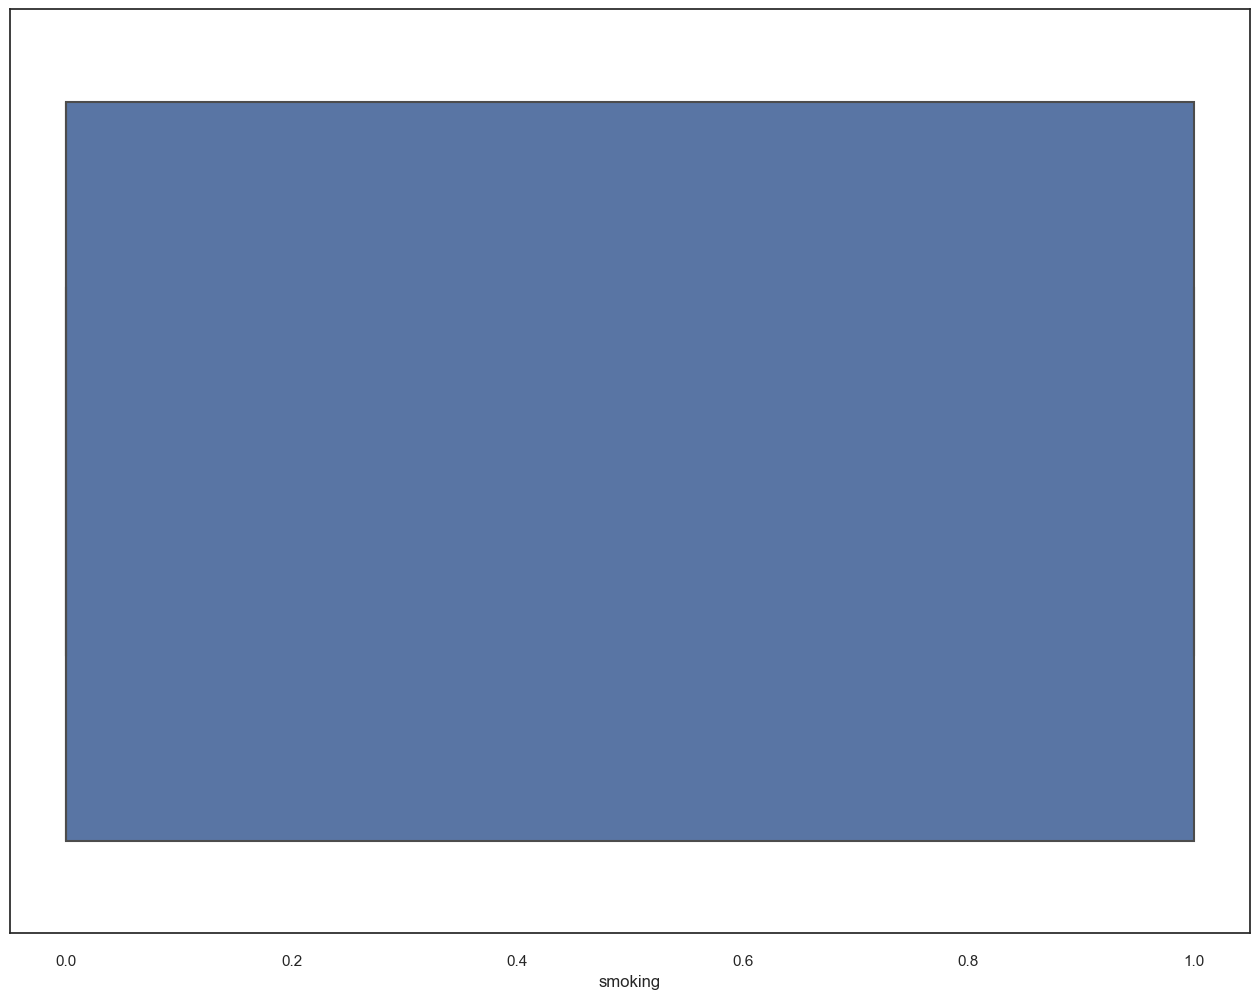

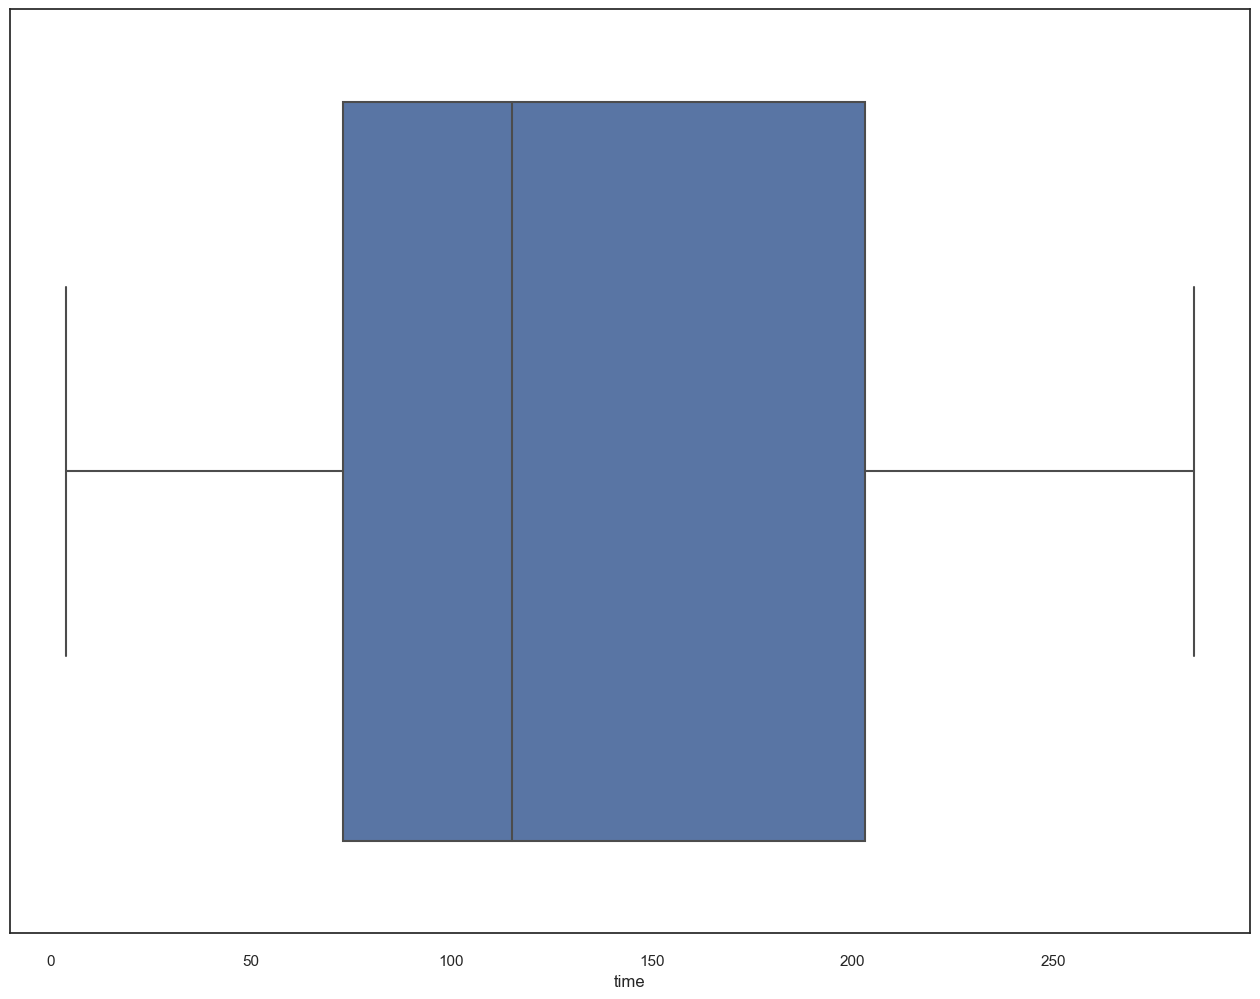

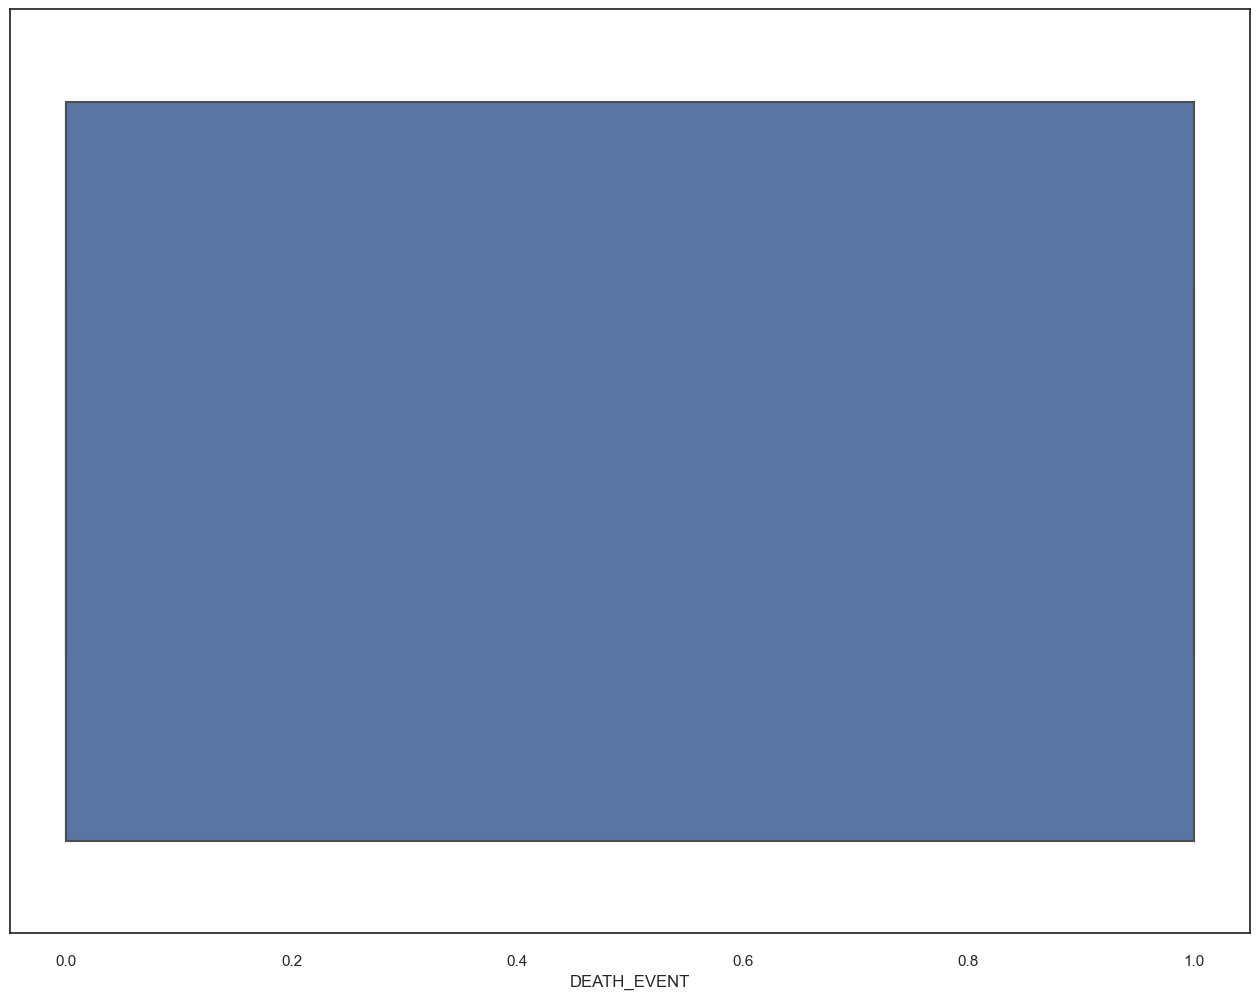

In [14]:
for col in df_HeartFailure.columns:
    plt.figure()
    sns.boxplot(x=df_HeartFailure[col])
plt.show()

sudah tidak terdapat nilai yang outlier kecuali pada serum_creatinine

In [15]:
# Setelah Outlier diatasi
df_HeartFailure.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.829431    0.431438                321.041806    0.418060   
std     11.894997    0.496107                266.039709    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                216.500000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               1211.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           37.836120             0.351171  254902.845318   
std            11.431877             0.478136   65545.455163   
min            14.000000             0.000000   87000.000000   
25%            30.000000             0.000000  218000.000000   
50%            38.000000             0.000000  258000.000000   
75%            45.000000             1.000000  287500.000000   
max            65.000000             1.000000  427000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count        299.000000    299.000000  299.000000  299.00000  299.000000   
mean           1.132676    136.872910    0.648829    0.32107  130.260870   
std            0.321682      3.841303    0.478136    0.46767   77.614208   
min            0.500000    125.000000    0.000000    0.00000    4.000000   
25%            0.900000    134.000000    0.000000    0.00000   73.000000   
50%            1.100000    137.000000    1.000000    0.00000  115.000000   
75%            1.200000    140.000000    1.000000    1.00000  203.000000   
max            2.100000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

# EDA (Exploratory Data Analysis)

In [16]:
continuous_data = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
categorical_data = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

df_HeartFailure[continuous_data].describe()

age  creatinine_phosphokinase  ejection_fraction      platelets  \
count  299.000000                299.000000         299.000000     299.000000   
mean    60.829431                321.041806          37.836120  254902.845318   
std     11.894997                266.039709          11.431877   65545.455163   
min     40.000000                 23.000000          14.000000   87000.000000   
25%     51.000000                116.500000          30.000000  218000.000000   
50%     60.000000                216.500000          38.000000  258000.000000   
75%     70.000000                582.000000          45.000000  287500.000000   
max     95.000000               1211.000000          65.000000  427000.000000   

       serum_creatinine  serum_sodium        time  
count        299.000000    299.000000  299.000000  
mean           1.132676    136.872910  130.260870  
std            0.321682      3.841303   77.614208  
min            0.500000    125.000000    4.000000  
25%            0.900000    134.000000   73.000000  
50%            1.100000    137.000000  115.000000  
75%            1.200000    140.000000  203.000000  
max            2.100000    148.000000  285.000000

## Distribusi Usia Pasien

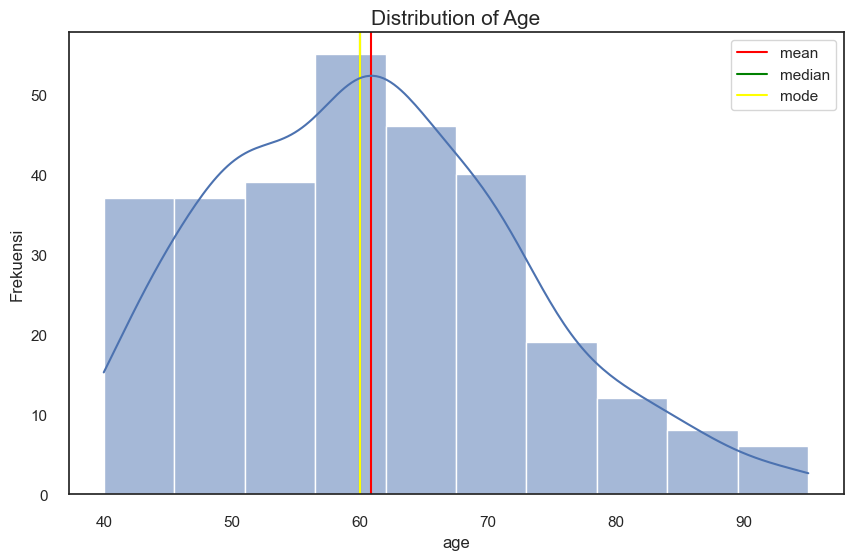

In [17]:
plt.figure(figsize = (10, 6))
plt.title("Distribution of Age", fontsize=15)
plt.ylabel('Frekuensi', fontsize=12)
plt.axvline(df_HeartFailure['age'].describe()['mean'], color = 'red', label = 'mean')
plt.axvline(df_HeartFailure['age'].describe()['50%'], color = 'green', label = 'median')
plt.axvline(df_HeartFailure['age'].mode()[0], color = 'yellow', label = 'mode')
sns.histplot(df_HeartFailure['age'], kde=True)
plt.legend()


Usia minimum yang tercatat dalam dataset ini adalah 40 tahun, sedangkan usia maksimumnya adalah 95 tahun dengan rata-rata usia pasien yaitu 61 tahun. Sebagian besar pasien berusia 60 tahun dalam dataset ini.

## Jumlah Pasien Meninggal

In [18]:
# Set Label
yes = len(df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 1])
no = len(df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 0])

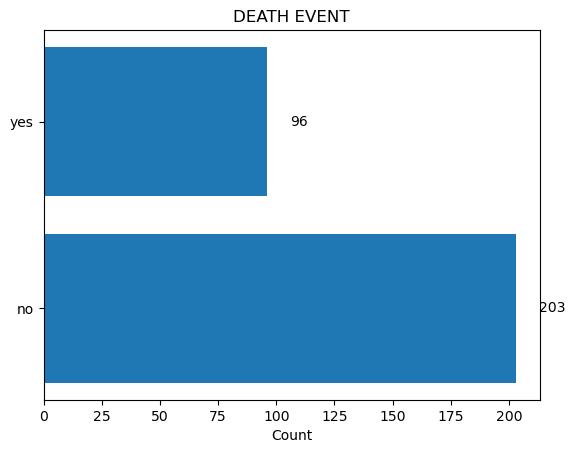

In [19]:
plt.rcdefaults()
fig, ax = plt.subplots()
y = ('yes', 'no')
y_total = np.arange(len(y))
x = (yes, no)
ax.barh(y_total, x, align='center')
ax.set_yticks(y_total)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('DEATH EVENT')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

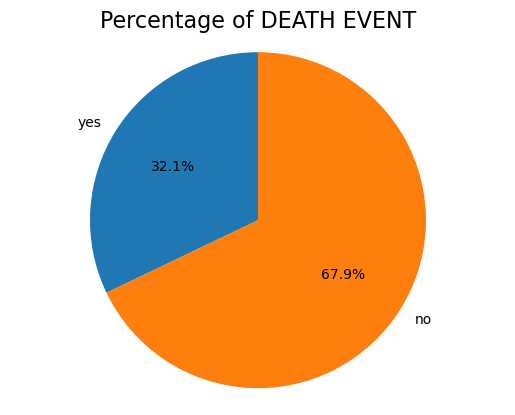

In [20]:
y = ('yes', 'no')
y_total = np.arange(len(y))
x = (yes, no)
labels = 'yes', 'no'
sizes = [yes, no]
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal')
plt.title('Percentage of DEATH EVENT', size=16)
plt.show()

Pasien yang tidak meninggal lebih banyak dibanding yang meninggal, terdapat 203 (67.9%) pasien yang tidak meninggal dan 96 (32.1%) pasien yang meninggal.

## Distribusi Pasien Meninggal Berdasarkan Gender (Sex)

In [21]:
# --- Create List of Color Palletes ---
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

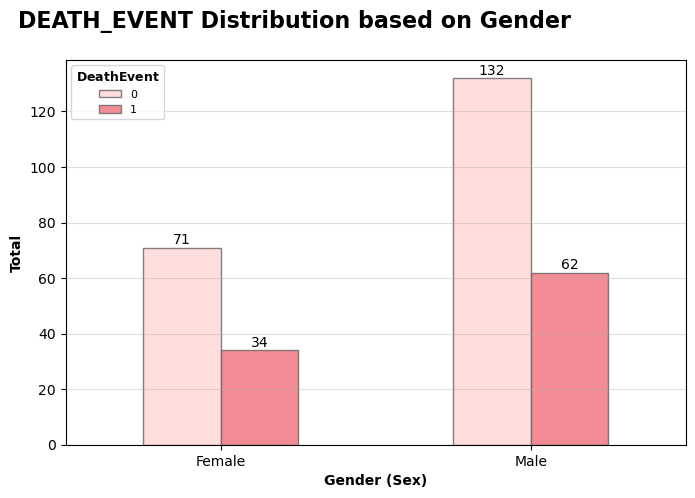

In [22]:
# Set Label
labels = ['0', '1']
label_gender = np.array([0, 1])
label_gender2 = ['Female', 'Male']

# Bar Chart
ax = pd.crosstab(df_HeartFailure.sex, df_HeartFailure.DEATH_EVENT).plot(kind='bar', figsize=(8, 5), 
                                         color=color_mix[2:4], 
                                         edgecolor=black_grad[2], alpha=0.85)
# Set Bar Chart
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('DEATH_EVENT Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif')
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold')
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Death Event}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

Pada plot distribusi death_event berdasarkan gender, terlihat bahwa pada pasien pria lebih banyak dibandingkan wanita. pada pria distribusi tidak seimbang dibandingkan dengan wanita yang memiliki distribusi hampir sama. Pada kedua gender ini, pasien yang meninggal (1) lebih sedikit dibanding pasien yang tidak meninggal (0).

## Distribusi Pasien Penderita Anemia

In [23]:
fig = px.pie(df_HeartFailure, names='anaemia', height=400, width= 400, color_discrete_sequence=px.colors.sequential.Blues_r,  title='Anaemia')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Terdapat 56.9% pasien yang tidak mempunyai anaemia, dan yang mempunyai anaemia 43.1%

## Distribusi Pasien Penderita Diabetes

In [24]:
fig = px.pie(df_HeartFailure, names='diabetes', height=400, width= 400, color_discrete_sequence=px.colors.sequential.Blues_r,  title='Diabetes')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Pasien yang mengidap diabetes sebanyak 41.8% dan yang tidak mempunyai riwayat diabetes lebih banyak yaitu 58.2%

## Distribusi Pasien Meninggal Berdasarkan Umur

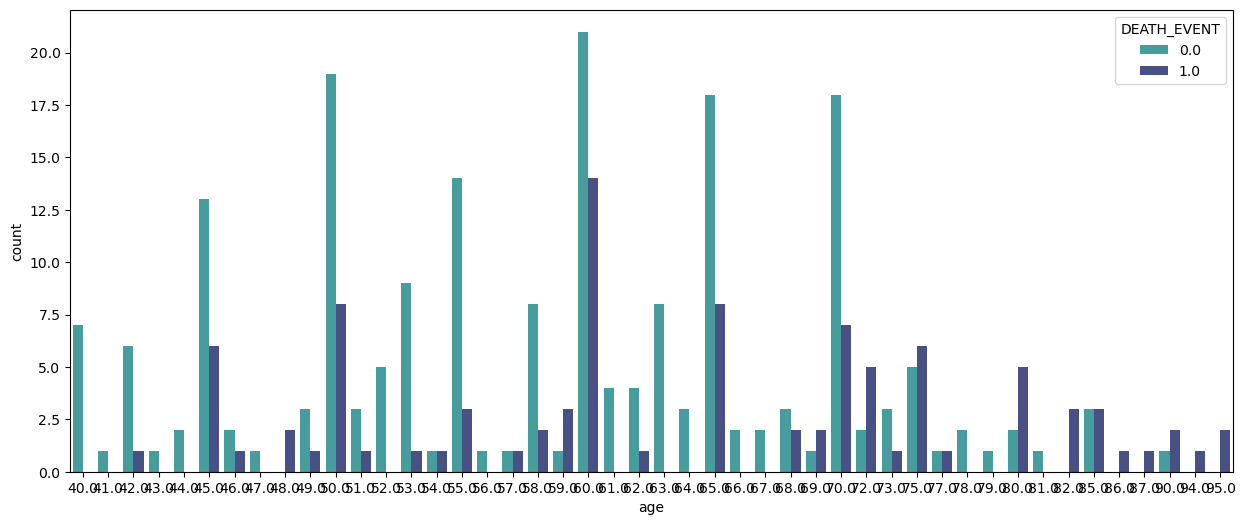

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df_HeartFailure, hue = 'DEATH_EVENT',palette='mako_r')
plt.show()

Maka diketahui pasien yang meninggal karna gagal jantung terbanyak pada umur 60 tahun, dan telihat pola mulai dari umur>42 tahun pasien yang meninggal semakin menurun.

## Ejection Fraction

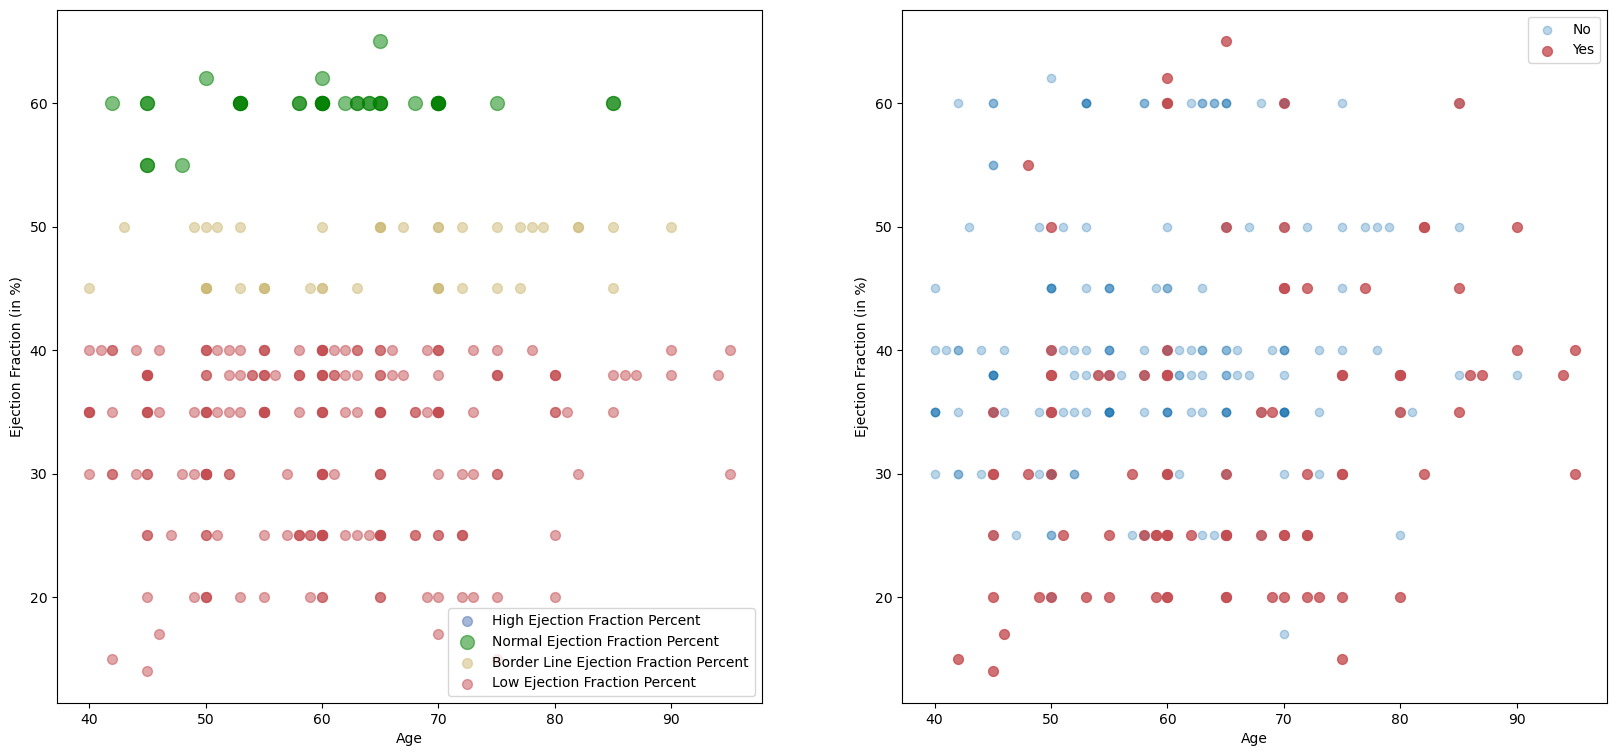

In [26]:
plt.figure(1 , figsize = (20, 9 ))

plt.subplot(1 , 2 , 1)
'''Fraksi ejeksi normal antara 50% sampai 75%, berdasarkan dari American Heart Association'''
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df_HeartFailure[(df_HeartFailure['ejection_fraction'] > 75)] , color = 'b' , s = 50  , alpha = 0.5 , 
           label = 'High Ejection Fraction Percent')
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df_HeartFailure[(df_HeartFailure['ejection_fraction'] <= 75) & (df_HeartFailure['ejection_fraction'] > 50 )] , 
            color = 'green' , s = 100  , alpha = 0.5 , label = 'Normal Ejection Fraction Percent')

'''Garis peningkatan fraksi ejeksi bisa dalam rentang antara 41% dan 50%'''
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df_HeartFailure[(df_HeartFailure['ejection_fraction'] <= 50 ) & (df_HeartFailure['ejection_fraction'] >= 41)] , 
            color = 'y' , s = 50 , alpha = 0.5 , label = 'Border Line Ejection Fraction Percent')
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df_HeartFailure[(df_HeartFailure['ejection_fraction'] <= 40 )] , color = 'r' , s = 50 , alpha = 0.5 , 
           label = 'Low Ejection Fraction Percent')
plt.xlabel('Age')
plt.ylabel('Ejection Fraction (in %)')
plt.legend()

plt.subplot(1 , 2 , 2 )
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 0 ] , label = 'No' , alpha = 0.3 )
plt.scatter(x = 'age' , y = 'ejection_fraction' , data = df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 1 ] , label = 'Yes' , s = 50 , color = 'r', alpha = 0.8 )
plt.xlabel('Age')
plt.ylabel('Ejection Fraction (in %)')
plt.legend()

plt.show()

Ejection Fraction (Fraksi ejeksi), mengukur jumlah darah yang dipompa keluar dari bilik bawah jantung, atau ventrikel. Ini adalah persentase darah yang meninggalkan ventrikel kiri saat jantung berkontraksi. Fraksi ejeksi normal adalah sekitar 50% hingga 75%, menurut American Heart Association. Fraksi ejeksi batas dapat berkisar antara 41% dan 50%

In [27]:
df = pd.DataFrame(df_HeartFailure)
df.query('ejection_fraction <= 75' and 'ejection_fraction >50')

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
7    60.0      1.0                     315.0       1.0               60.0   
8    65.0      0.0                     157.0       0.0               65.0   
19   48.0      1.0                     582.0       1.0               55.0   
23   53.0      0.0                      63.0       1.0               60.0   
44   60.0      1.0                     588.0       1.0               60.0   
52   60.0      0.0                     216.5       1.0               62.0   
76   70.0      0.0                      92.0       0.0               60.0   
87   65.0      1.0                      68.0       1.0               60.0   
92   42.0      0.0                     582.0       0.0               60.0   
95   58.0      1.0                     133.0       0.0               60.0   
97   70.0      1.0                      59.0       0.0               60.0   
110  85.0      0.0                     129.0       0.0               60.0   
113  70.0      1.0                     143.0       0.0               60.0   
116  60.0      1.0                      96.0       1.0               60.0   
117  85.0      1.0                     102.0       0.0               60.0   
118  65.0      1.0                     113.0       1.0               60.0   
120  60.0      1.0                     737.0       0.0               60.0   
127  58.0      1.0                     200.0       1.0               60.0   
130  53.0      1.0                     216.5       0.0               60.0   
133  63.0      0.0                     193.0       0.0               60.0   
136  65.0      1.0                      59.0       1.0               60.0   
147  64.0      0.0                     216.5       0.0               60.0   
151  62.0      0.0                      30.0       1.0               60.0   
166  53.0      0.0                     196.0       0.0               60.0   
172  70.0      1.0                     171.0       0.0               60.0   
175  60.0      1.0                      95.0       0.0               60.0   
178  63.0      1.0                     122.0       1.0               60.0   
191  64.0      1.0                      62.0       0.0               60.0   
201  45.0      0.0                     308.0       1.0               60.0   
202  70.0      0.0                      97.0       0.0               60.0   
211  50.0      0.0                     582.0       0.0               62.0   
225  75.0      0.0                     675.0       1.0               60.0   
254  53.0      1.0                     446.0       0.0               60.0   
263  68.0      1.0                     157.0       1.0               60.0   
287  45.0      0.0                     582.0       1.0               55.0   
290  45.0      0.0                     615.0       1.0               55.0   
296  45.0      0.0                     216.5       1.0               60.0   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
7                    0.0  258000.00              1.10         131.0  1.0   
8                    0.0  263358.03              1.50         138.0  0.0   
19                   0.0   87000.00              1.90         137.0  0.0   
23                   0.0  368000.00              0.80         135.0  1.0   
44                   0.0  194000.00              1.10         142.0  0.0   
52                   0.0  263358.03              1.10         146.0  0.0   
76                   1.0  317000.00              0.80         140.0  0.0   
87                   1.0  304000.00              0.80         140.0  1.0   
92                   0.0  263358.03              1.18         137.0  0.0   
95                   1.0  219000.00              1.00         141.0  1.0   
97                   0.0  255000.00              1.10         136.0  0.0   
110                  0.0  306000.00              1.20         132.0  1.0   
113                  0.0  351000.00              1.30         137.0  0.0   
116            

untuk pasien yang memiliki fraksi ejeksi normal sebanyak 37 pasien dengan jumlah pasien yang meninggal sebanyak 7.

## Platelets

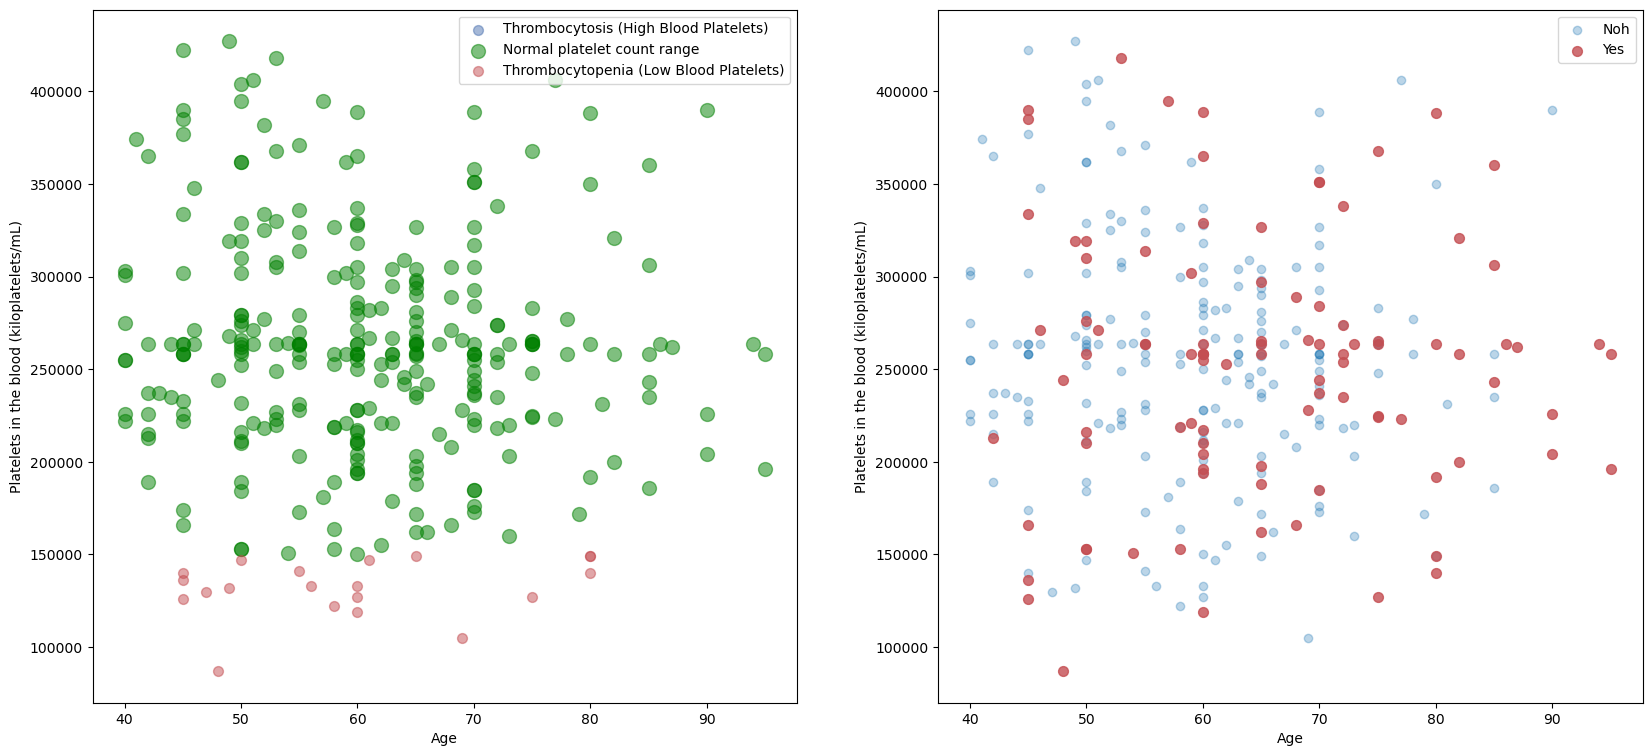

In [28]:
plt.figure(1 , figsize = (20, 9 ))

plt.subplot(1 , 2 , 1)
'''Jumlah trombosit normal berada direntang 150,000 sampai 450,000 trombosit per mikroliter darah.'''
plt.scatter(x = 'age' , y = 'platelets' , data = df_HeartFailure[(df_HeartFailure['platelets'] > 450001)] , color = 'b' , s = 50  , alpha = 0.5 , 
           label = 'Thrombocytosis (High Blood Platelets)')
plt.scatter(x = 'age' , y = 'platelets' , data = df_HeartFailure[(df_HeartFailure['platelets'] <= 450000) & (df_HeartFailure['platelets'] >= 150000 )] , 
            color = 'green' , s = 100  , alpha = 0.5 , label = 'Normal platelet count range')
plt.scatter(x = 'age' , y = 'platelets' , data = df_HeartFailure[(df_HeartFailure['platelets'] < 150000 )] , color = 'r' , s = 50 , alpha = 0.5 , 
           label = 'Thrombocytopenia (Low Blood Platelets)')
plt.xlabel('Age')
plt.ylabel('Platelets in the blood (kiloplatelets/mL)')
plt.legend()

plt.subplot(1 , 2 , 2 )
plt.scatter(x = 'age' , y = 'platelets' , data = df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 0 ] , label = 'Noh' , alpha = 0.3 )
plt.scatter(x = 'age' , y = 'platelets' , data = df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 1 ] , label = 'Yes' , s = 50 , color = 'r', alpha = 0.8 )
plt.xlabel('Age')
plt.ylabel('Platelets in the blood (kiloplatelets/mL)')
plt.legend()

plt.show()

Jumlah trombosit normal berkisar antara 150.000 hingga 450.000 trombosit per mikroliter darah. Memiliki lebih dari 450.000 trombosit adalah suatu kondisi yang disebut trombositosis. Memiliki kurang dari 150.000 dikenal sebagai trombositopenia

In [29]:
df = pd.DataFrame(df_HeartFailure)
df.query('platelets > 450001')

Empty DataFrame
Columns: [age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex, smoking, time, DEATH_EVENT]
Index: []

Tidak ada pasien yang memiliki trombosit tinggi. 

## Serum Sodium

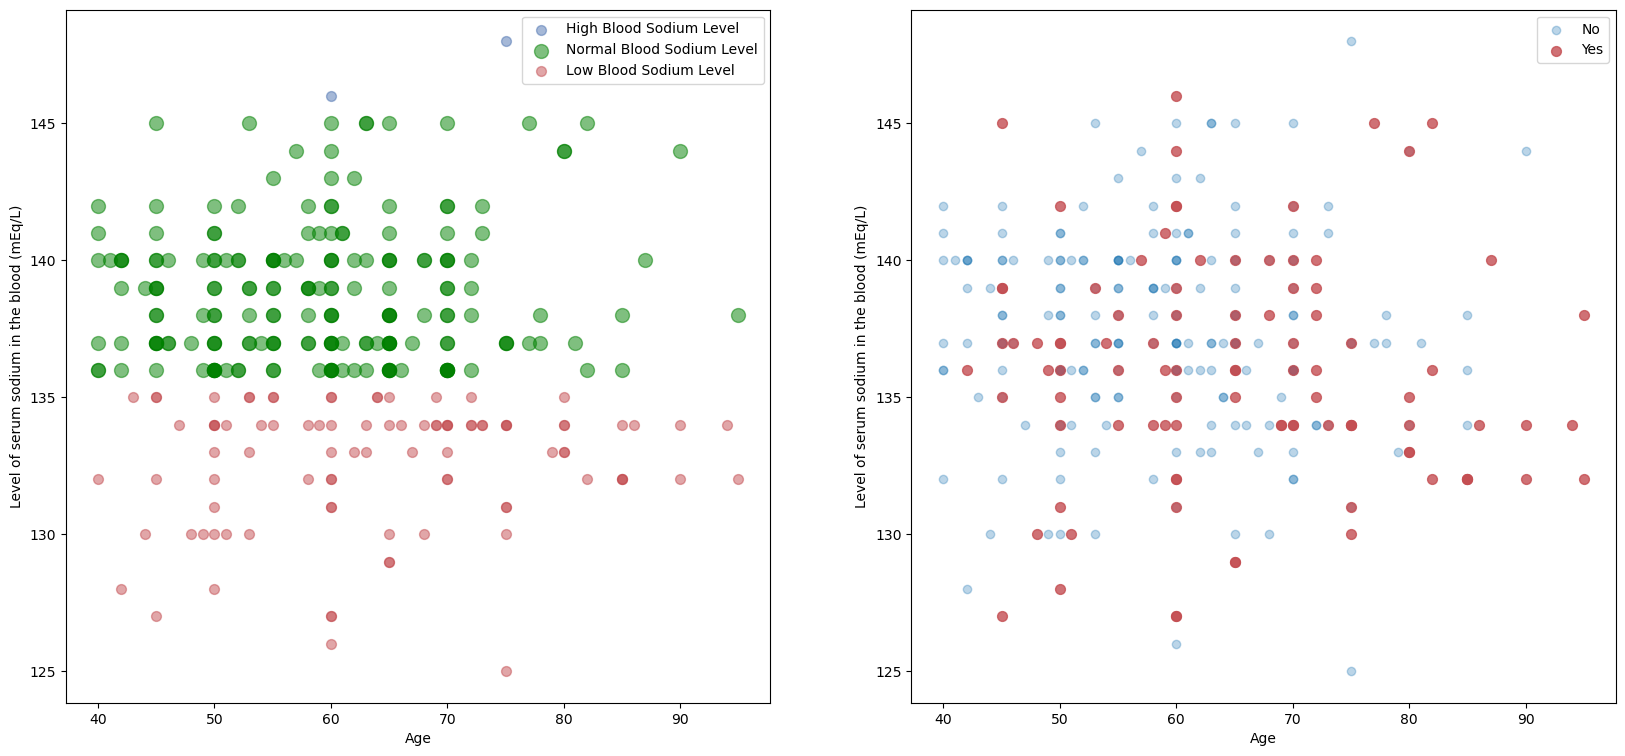

In [30]:
plt.figure(1 , figsize = (20, 9 ))

plt.subplot(1 , 2 , 1)
'''level normal antara 135 sampai 145 mEq/L.'''
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df_HeartFailure[(df_HeartFailure['serum_sodium'] > 145)] , color = 'b' , s = 50  , alpha = 0.5 , 
           label = 'High Blood Sodium Level ')
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df_HeartFailure[(df_HeartFailure['serum_sodium'] <= 145) & (df_HeartFailure['serum_sodium'] > 135 )] , 
            color = 'green' , s = 100  , alpha = 0.5 , label = 'Normal Blood Sodium Level')
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df_HeartFailure[(df_HeartFailure['serum_sodium'] <= 135 )] , 
            color = 'r' , s = 50 , alpha = 0.5 , label = 'Low Blood Sodium Level')

plt.xlabel('Age')
plt.ylabel('Level of serum sodium in the blood (mEq/L)')
plt.legend()

plt.subplot(1 , 2 , 2 )
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 0 ] , label = 'No' , alpha = 0.3 )
plt.scatter(x = 'age' , y = 'serum_sodium' , data = df_HeartFailure[df_HeartFailure['DEATH_EVENT'] == 1 ] , label = 'Yes' , s = 50 , color = 'r', alpha = 0.8 )
plt.xlabel('Age')
plt.ylabel('Level of serum sodium in the blood (mEq/L)')
plt.legend()

plt.show()

Kadar natrium darah normal berkisar antara 135 hingga 145 mEq/L. Jika memiliki kadar natrium darah kurang dari 135 mEq/L, maka kemungkinan menderita hiponatremia. Jika memiliki kadar natrium darah lebih dari 145 mEq/L, maka kemungkinan mengalami hipernatremia.

In [31]:
df = pd.DataFrame(df_HeartFailure)
df.query('serum_sodium > 145')

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
52   60.0      0.0                     216.5       1.0               62.0   
236  75.0      0.0                     119.0       0.0               50.0   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
52                   0.0  263358.03               1.1         146.0  0.0   
236                  1.0  248000.00               1.1         148.0  1.0   

     smoking   time  DEATH_EVENT  
52       0.0   43.0          1.0  
236      0.0  209.0          0.0

pasien yang menderita hipernatremia sebanyak 2 orang dengan kadar nya > 145 mEq/L, dan 1 pasien meninggal

## Jumlah Pasien Meninggal Berdasarkan Smoking

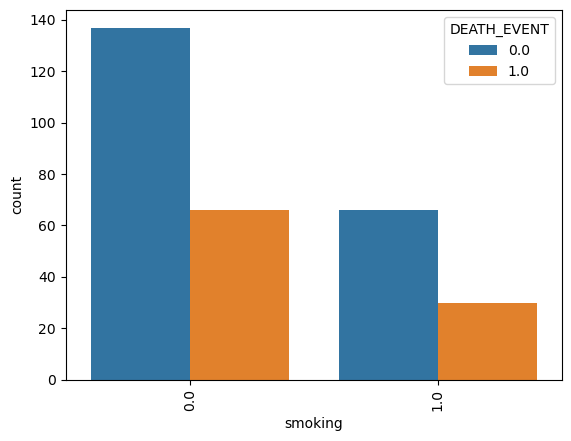

In [32]:
def died(param):
    g = sns.countplot(data=df_HeartFailure, x=param, hue='DEATH_EVENT')
    plt.xticks(rotation=90)
    plt.show()

attributes = ['smoking']

for attribute in attributes:
    died(attribute)

In [33]:
df_smoking = pd.DataFrame(df_HeartFailure.groupby(['smoking','DEATH_EVENT'])['DEATH_EVENT'].size().sort_values(ascending=False))
df_smoking.head()

DEATH_EVENT
smoking DEATH_EVENT             
0.0     0.0                  137
        1.0                   66
1.0     0.0                   66
        1.0                   30

dari 96 perokok memiliki risiko 31% menderita gagal jantung (30 meninggal, 66 hidup), sedangkan 203 bukan perokok memiliki peluang 32,5% (66 meninggal, 137 hidup)

# Data Preprocessing

## Korelasi

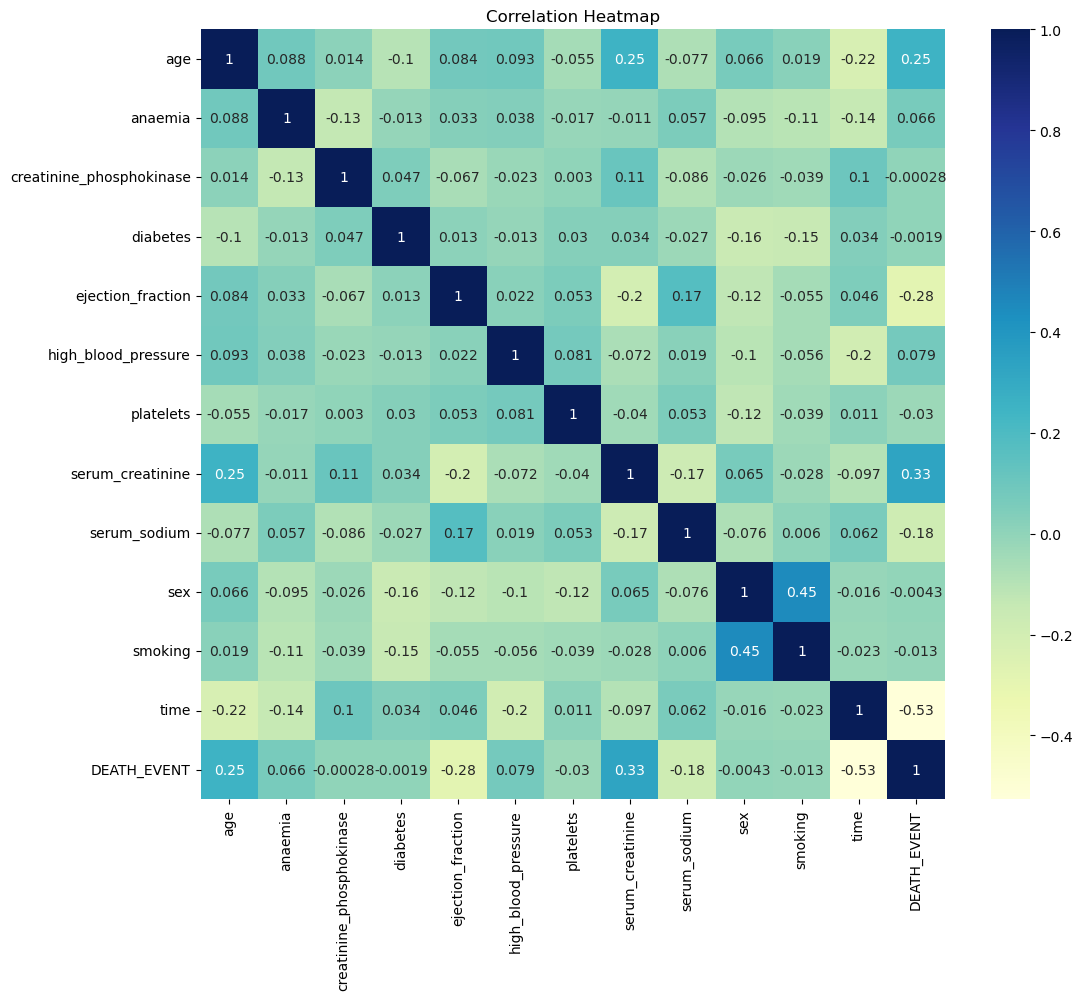

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(df_HeartFailure.corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap");

- Terdapat korelasi negatif antara time dan DEATH_EVENT sebesar -0.53 artinya korelasi antara dua variabel ini berlawanan atau terbalik.
- Terdapat korelasi positif antara age dan DEATH_EVENT & serum_creatinine dan DEATH_EVENT yang artinya hubungan dua variabel ini bergerak dalam arah yang sama.
- Untuk variabel lainny memiliki korelasi yang netral dengan DEATH_EVENT, perubahan tidak mempengaruhi DEATH_EVENT.

**Menghapus kolom yang tidak digunakan**

In [35]:
HF_Final = df_HeartFailure.drop(columns= ['time'])

HF_Final.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0      0.0                     582.0       0.0               20.0   
1  55.0      0.0                     216.5       0.0               38.0   
2  65.0      0.0                     146.0       0.0               20.0   
3  50.0      1.0                     111.0       0.0               20.0   
4  65.0      1.0                     160.0       1.0               20.0   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                  1.0  265000.00               1.9         130.0  1.0   
1                  0.0  263358.03               1.1         136.0  1.0   
2                  0.0  162000.00               1.3         129.0  1.0   
3                  0.0  210000.00               1.9         137.0  1.0   
4                  0.0  327000.00               1.1         137.0  0.0   

   smoking  DEATH_EVENT  
0      0.0          1.0  
1      0.0          1.0  
2      1.0          1.0  
3      0.0          1.0  
4      0.0          1.0

Menghapus variabel time , karena tidak berhubungan dengan death_event. dan tujuannya adalah untuk memprediksi kematian atau kelangsungan hidup pasien, time tidak boleh digunakan sebagai input model.

## Scaling Data

In [36]:
scaler = StandardScaler()

In [37]:
data_X = HF_Final.drop(columns = ['DEATH_EVENT'])

X = scaler.fit_transform(data_X)
y = HF_Final["DEATH_EVENT"]

## Split Data

In [38]:
# Split dataset menjadi training 80% dan testing 20%
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [39]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(239, 11)
(60, 11)
(239,)
(60,)


# Modelling

## RANDOM FOREST

In [40]:
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [41]:
y_pred_rf = model_rf.predict(x_test)

print('Accuracy of Random Forest classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_rf)))  

Accuracy of Random Forest classifier on test set: 0.80000


## GRADIENT BOOSTING

**GRADIENT BOOSTING**

**Boosting** adalah metode untuk mengubah pembelajaran yang lemah menjadi pembelajaran yang kuat. Dalam meningkatkan, setiap pohon baru cocok dengan versi modifikasi dari kumpulan data asli. Ini sangat bergantung pada prediksi bahwa model berikutnya akan mengurangi kesalahan prediksi ketika digabung dengan yang sebelumnya. Ide utamanya adalah untuk menetapkan hasil target untuk model yang akan datang ini untuk meminimalkan kesalahan.

**Gradient Boosting** melatih banyak model secara bertahap, aditif, dan berurutan. Istilah peningkatan gradien muncul karena hasil target setiap kasus didasarkan pada kesalahan gradien sehubungan dengan prediksi. Setiap model mengurangi kesalahan prediksi dengan mengambil langkah ke arah yang benar.

In [42]:
model_GB = ensemble.GradientBoostingClassifier(random_state=1)
model_GB.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [43]:
y_pred_GB = model_GB.predict(x_test)

print('Accuracy of Gradient Boosting classifier on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_GB)))  

Accuracy of Gradient Boosting classifier on test set: 0.78333


## Hyperparameter Tuning Random Forest

In [44]:
rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,10),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [45]:
RF_rs = RandomizedSearchCV(model_rf, rs_space, n_iter=100, scoring='accuracy', n_jobs=-1, cv=3)
RF_rs_result = RF_rs.fit(x_train, y_train)

#Prediksi menggunakan model tuning
y_pred_rf_tunned = RF_rs_result.predict(x_test)

print('Accuracy of Random Forest classifier Tuning on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_rf_tunned)))  

Accuracy of Random Forest classifier Tuning on test set: 0.85000


In [46]:
print(RF_rs.best_params_)
print(classification_report(y_test, y_pred_rf_tunned))

{'criterion': 'entropy', 'max_depth': 80, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 60}
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.91        46
         1.0       0.73      0.57      0.64        14

    accuracy                           0.85        60
   macro avg       0.80      0.75      0.77        60
weighted avg       0.84      0.85      0.84        60



## Hyperparameter Tuning Gradient Boosting

In [47]:
GBC_parameter_grid = {
         'n_estimators': np.arange(10,150,10), 
         'max_depth': range(1,20),
         'learning_rate': [0.001, 0.01, 0.1]
         }

GBC_rs = RandomizedSearchCV(model_GB, GBC_parameter_grid, scoring='roc_auc',n_jobs=4, cv=3)
GBC_rs_result = GBC_rs.fit(x_train,y_train)

#Prediksi menggunakan model tuning
y_pred_gb_tunned = GBC_rs_result.predict(x_test)

print('Accuracy of Gradient Boosting Tuning on test set: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_gb_tunned)))  

Accuracy of Gradient Boosting Tuning on test set: 0.75000


In [48]:
print(GBC_rs.best_params_)
print(classification_report(y_test, y_pred_gb_tunned))

{'n_estimators': 30, 'max_depth': 2, 'learning_rate': 0.1}
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85        46
         1.0       0.43      0.21      0.29        14

    accuracy                           0.75        60
   macro avg       0.61      0.56      0.57        60
weighted avg       0.71      0.75      0.72        60



# Evaluasi Model

In [49]:
rf = metrics.accuracy_score(y_test, y_pred_rf)
gb = metrics.accuracy_score(y_test, y_pred_GB)
rfc_tunned = metrics.accuracy_score(y_test, y_pred_rf_tunned)
gb_tunned = metrics.accuracy_score(y_test, y_pred_gb_tunned)

In [50]:
# Create Accuracy Comparison Table 
compare = pd.DataFrame({'Model': ['Random Forest', 'Gradient Boosting', 'Random Forest Tunned', 'Gradient Boosting Tunned'], 
                        'Accuracy': [rf*100, gb*100, rfc_tunned*100, gb_tunned*100]})

# Create Accuracy Comparison Table
compare_sorted = compare.sort_values(by='Accuracy', ascending=False).style.background_gradient(cmap='PuRd').set_table_styles([{'selector': 'thead', 'props': [('background', '#606062')]}])

# Set font family for better appearance
compare_sorted.set_properties(**{'font-family': 'Segoe UI'})

# Display the styled table
compare_sorted


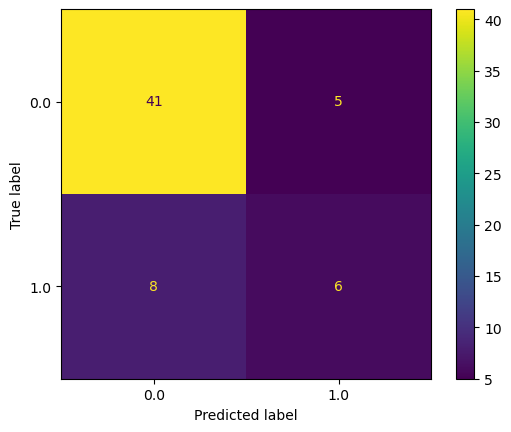

In [51]:
clf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
clf.fit(X_train, y_train)

# Example: Using plot_confusion_matrix
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

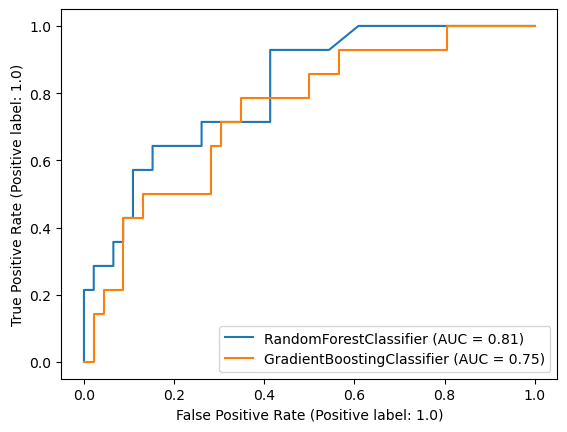

In [52]:
from sklearn.metrics import RocCurveDisplay

fig = plt.figure()
ax = fig.gca()

rfc_disp = RocCurveDisplay.from_estimator(model_rf, x_test, y_test, ax=ax)
gbc_disp = RocCurveDisplay.from_estimator(model_GB, x_test, y_test, ax=ax)

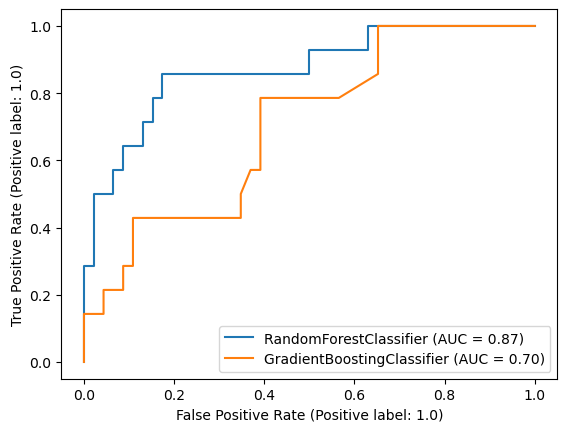

In [53]:
#tuning parameter
fig = plt.figure()
ax = fig.gca()

RF_disp = RocCurveDisplay.from_estimator(RF_rs.best_estimator_, x_test, y_test, ax=ax)
GB_disp = RocCurveDisplay.from_estimator(GBC_rs.best_estimator_, x_test, y_test, ax=ax)

**Model Random Forest dan Gradient Boosting**

In [54]:
model_rf_tunned = RandomForestClassifier(criterion='entropy', max_depth=None, max_features=4, min_samples_leaf=1, min_samples_split=8, n_estimators=60)
model_rf_tunned.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=4, min_samples_split=8,
                       n_estimators=60)

In [55]:
# Feature Important
feature_imp = pd.Series(model_rf_tunned.feature_importances_, index=data_X.columns).sort_values(ascending=False)

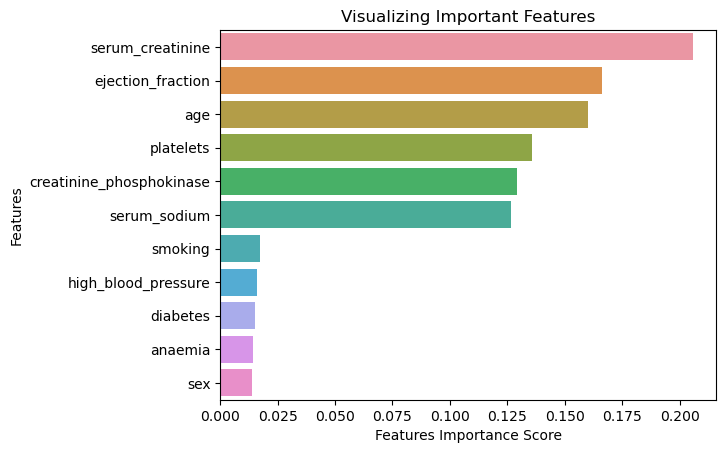

In [56]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Features Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')

plt.show()

Berdasarkan feature important, 3 feature yang sangat penting adalah serum_creatinine, ejection_fraction dan age.

# Prediksi

Data yang dibutuhkan untuk memprediksi yaitu age, anaemia, creatinine_phosphokinase, diabetes, ejection_fraction, high_blood_pressure, platelets, serum_creatinine, serum_sodium, sex dan smoking

In [57]:
HF_Final

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0      0.0                     582.0       0.0               20.0   
1    55.0      0.0                     216.5       0.0               38.0   
2    65.0      0.0                     146.0       0.0               20.0   
3    50.0      1.0                     111.0       0.0               20.0   
4    65.0      1.0                     160.0       1.0               20.0   
..    ...      ...                       ...       ...                ...   
294  62.0      0.0                      61.0       1.0               38.0   
295  55.0      0.0                     216.5       0.0               38.0   
296  45.0      0.0                     216.5       1.0               60.0   
297  45.0      0.0                     216.5       0.0               38.0   
298  50.0      0.0                     196.0       0.0               45.0   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1.0  265000.00               1.9         130.0  1.0   
1                    0.0  263358.03               1.1         136.0  1.0   
2                    0.0  162000.00               1.3         129.0  1.0   
3                    0.0  210000.00               1.9         137.0  1.0   
4                    0.0  327000.00               1.1         137.0  0.0   
..                   ...        ...               ...           ...  ...   
294                  1.0  155000.00               1.1         143.0  1.0   
295                  0.0  270000.00               1.2         139.0  0.0   
296                  0.0  258000.00               0.8         138.0  0.0   
297                  0.0  140000.00               1.4         140.0  1.0   
298                  0.0  395000.00               1.6         136.0  1.0   

     smoking  DEATH_EVENT  
0        0.0          1.0  
1        0.0          1.0  
2        1.0          1.0  
3        0.0          1.0  
4        0.0          1.0  
..       ...          ...  
294      1.0          0.0  
295      0.0          0.0  
296      0.0          0.0  
297      1.0          0.0  
298      1.0          0.0  

[299 rows x 12 columns]

In [58]:
X_pred = [60, 0, 216, 1, 38, 1, 162000, 1.6, 130, 1, 0]

In [59]:
y_pred_rf_tunned = RF_rs_result.predict([X_pred])

In [60]:
print(y_pred_rf_tunned)

if (y_pred_rf_tunned == 1):
    print("Pasien diprediksi Meninggal")
else:
    print("Pasien diprediksi Tidak Meninggal")

[1.]
Pasien diprediksi Meninggal
